# Exploring INPA's Bird Collection Database 

> *written by Nelson Buainain, 2021*

<img src=https://acta.inpa.gov.br/logo_inpa/COLECOES/PNG/colecoes-recursosgeneticos.png width="300">

## Data description 

This database consist of about 28,000 records genetic material of bird that are housed at INPA's scientific collection. These records have been collected in the past decades and, although there was an attempt to standardize the quality and completeness of data, this is mostly not consistent. I extensively reviewed this database correcting and inserting missing data information in the past one year. This process was done mostly manually using Microsoft Excel because of the importance to keep correctness of information of each individual data. Thus, all the ramaining missing data is mostly information that could not be retrieved and could not be inputed. Pandas was used to help visualizing missing data and get a general view of the database.

## Purpose

This is the code I used as part of a data science project to explore the Instituto Nacional de Pesquisas da Amazonia (INPA)'s bird tissue collection. 

The goal of this project was to:

* check the quality of the data being input in the database 
* check how much data is missing and what are the most problematic fields
* infer what are the most and least representative groups, areas, collectors, etc, in the collection 
* provide some basic statistics about the collection


This will help to improve future decisions on how to manage information, improve data collecting, optimize financial resources for future expeditions, which taxa to collect and to not collect, etc... 

## Variables descriptions

## Importing packages

In [1513]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing some functions that will be useful along the analses

In [686]:
# A second function to add percentage over countplot, I will leave this here as backup
# Function to add percentage over bars in count plots
# def bar_percentage(plot, feature):
#     total = len(feature)
#     for p in ax.patches:
#         percentage = '{:.1f}%'.format(100 * p.get_height()/total)
#         x = p.get_x() + p.get_width() / 3.5 - 0.05
#         y = p.get_y() + p.get_height()
#         ax.annotate(percentage, (x, y), size = 12,ha='center', va='bottom')

In [1514]:
#ANOTHER FUNCTION TO ADD PERCENTAGE OVER BAR OR COUNT PLOT
def add_perc(plot, feature):
    total = len(feature)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/len(feature)), (x.mean(), y), ha='center', va='bottom')


## Importing the database

In [1515]:
db = pd.read_csv('database/inpa_bird_collection_database.csv',sep=';',decimal=',')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (3,38,40,42,43,45,46,47,49,50,51,53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1384]:
db.head()

,No TEC.,numero,Sigla prep,Nº prepa,Nome preparador,Sigla campo,Nº campo,ORDEM,FAMÍLIA,GÊNERO,ESPÉCIE,GÊNERO ESPÉCIE,SEXO,EXPEDIÇÃO,EST,LOCALIDADE,area_endemism,LAT G,LAT M,LAT S,LAT_N/S,LON G,LON M,LON S,LON_E/W,LAT_DEC,LON_DEC,TEMPO ATÉ CONSERVAR,MÉTODO DE COLETA,MÚSCULO,CORAÇÃO,FÍGADO,SANGUE,MEIO PRESERV. DEF.,DATA COLETA,DATA PREP.,OBSERVAÇÕES,EMPRESTADO,DATA,GUIA N°,PARA,Obs,EMPRESTADO.1,DATA.1,GUIA N°.1,PARA.1,EMPRESTADO.2,DATA.2,GUIA N°.2,PARA.2,EMPRESTADO.3,DATA.3,GUIA N°.3,PARA.3
0,INPA A 001,1,MCH,553.0,Mario Cohn-Haft,NaN,NaN,Passeriformes,Tyrannidae,Elaenia,parvirostris,Elaenia parvirostris,F,Provárzea 2003,AM,"ca 60 km ENE Tabatinga, margem direita Rio Sol...",Inambari,4.0,1.0,30.0,S,69.0,27.0,10.0,W,-4.025,-69.453,10 h,NaN,X,X,X,NaN,Nitrogênio líquido,11/09/2003,11/09/2003,♀,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INPA A 002,2,LNN,4.0,Luciano Nicolás Naka,NaN,NaN,Piciformes,Capitonidae,Capito,aurovirens,Capito aurovirens,M,Provárzea 2003,AM,"ca 60 km ENE Tabatinga, margem direita Rio Sol...",Inambari,4.0,1.0,30.0,S,69.0,27.0,10.0,W,-4.025,-69.453,10 h,NaN,X,X,X,NaN,Nitrogênio líquido,11/09/2003,11/09/2003,♂,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INPA A 003,3,AMF,64.0,Alexandre Mendes Fernandes,NaN,NaN,Galbuliformes,Galbulidae,Galbalcyrhynchus,leucotis,Galbalcyrhynchus leucotis,F,Provárzea 2003,AM,"ca 60 km ENE Tabatinga, margem direita Rio Sol...",Inambari,4.0,1.0,30.0,S,69.0,27.0,10.0,W,-4.025,-69.453,10 h,NaN,X,X,X,NaN,Nitrogênio líquido,11/09/2003,11/09/2003,♀,X,21/09/2010,59.0,Claydson P. de Assis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INPA A 004,4,MCH,554.0,Mario Cohn-Haft,NaN,NaN,Passeriformes,Thamnophilidae,Hypocnemoides,maculicauda,Hypocnemoides maculicauda,M,Provárzea 2003,AM,"ca 60 km ENE Tabatinga, margem direita Rio Sol...",Inambari,4.0,1.0,30.0,S,69.0,27.0,10.0,W,-4.025,-69.453,10 h,NaN,X,X,X,NaN,Nitrogênio líquido,11/09/2003,11/09/2003,♂ im.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INPA A 005,5,LNN,5.0,Luciano Nicolás Naka,NaN,NaN,Passeriformes,Troglodytidae,Pheugopedius,genibarbis,Pheugopedius genibarbis,M,Provárzea 2003,AM,"Boca rio Jandietuba, ca 12 km E São Paulo de O...",Inambari,3.0,27.0,30.0,S,68.0,50.0,40.0,W,-3.458,-68.844,3 h,NaN,X,X,X,NaN,Nitrogênio líquido,12/09/2003,12/09/2003,♂,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Getting to know our data base

> We will take a look at the general information of our dataset to start to get know it

In [1385]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28734 entries, 0 to 28733
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No TEC.              28734 non-null  object 
 1   numero               28734 non-null  int64  
 2   Sigla prep           14831 non-null  object 
 3   Nº prepa             13162 non-null  object 
 4   Nome preparador      25331 non-null  object 
 5   Sigla campo          16278 non-null  object 
 6   Nº campo             16291 non-null  object 
 7   ORDEM                26483 non-null  object 
 8   FAMÍLIA              26483 non-null  object 
 9   GÊNERO               26490 non-null  object 
 10  ESPÉCIE              26263 non-null  object 
 11  GÊNERO ESPÉCIE       26490 non-null  object 
 12  SEXO                 18363 non-null  object 
 13  EXPEDIÇÃO            19687 non-null  object 
 14  EST                  26368 non-null  object 
 15  LOCALIDADE           26421 non-null 

In [1386]:
db.columns

Index(['No TEC.', 'numero', 'Sigla prep', 'Nº prepa', 'Nome preparador',
       'Sigla campo', 'Nº campo', 'ORDEM', 'FAMÍLIA', 'GÊNERO', 'ESPÉCIE',
       'GÊNERO ESPÉCIE', 'SEXO', 'EXPEDIÇÃO', 'EST', 'LOCALIDADE',
       'area_endemism', 'LAT G', 'LAT M', 'LAT S', 'LAT_N/S', 'LON G', 'LON M',
       'LON S', 'LON_E/W', 'LAT_DEC', 'LON_DEC', 'TEMPO ATÉ CONSERVAR',
       'MÉTODO DE COLETA', 'MÚSCULO', 'CORAÇÃO', 'FÍGADO', 'SANGUE',
       'MEIO PRESERV. DEF.', 'DATA COLETA', 'DATA PREP.', 'OBSERVAÇÕES',
       'EMPRESTADO', 'DATA', 'GUIA N°', 'PARA', 'Obs', 'EMPRESTADO.1',
       'DATA.1', 'GUIA N°.1', 'PARA.1', 'EMPRESTADO.2', 'DATA.2', 'GUIA N°.2',
       'PARA.2', 'EMPRESTADO.3', 'DATA.3', 'GUIA N°.3', 'PARA.3'],
      dtype='object')

** We will select only the columns that may potentially will give us some interesting information **


In [1516]:
data = db[['No TEC.', 'Nome preparador','ORDEM', 'FAMÍLIA', 'GÊNERO', 'ESPÉCIE', 'GÊNERO ESPÉCIE',
       'SEXO', 'EST', 'LOCALIDADE','area_endemism', 'LAT_DEC', 'LON_DEC',
       'TEMPO ATÉ CONSERVAR', 'MÉTODO DE COLETA', 'MÚSCULO', 'CORAÇÃO',
       'FÍGADO', 'SANGUE', 'MEIO PRESERV. DEF.', 'DATA COLETA', 'DATA PREP.',
'EMPRESTADO', 'DATA', 'GUIA N°', 'PARA', 'Obs', 'EMPRESTADO.1',
       'DATA.1', 'GUIA N°.1', 'PARA.1', 'EMPRESTADO.2', 'DATA.2', 'GUIA N°.2',
       'PARA.2', 'EMPRESTADO.3', 'DATA.3', 'GUIA N°.3', 'PARA.3']]

In [1388]:
data.head()

,No TEC.,Nome preparador,ORDEM,FAMÍLIA,GÊNERO,ESPÉCIE,GÊNERO ESPÉCIE,SEXO,EST,LOCALIDADE,area_endemism,LAT_DEC,LON_DEC,TEMPO ATÉ CONSERVAR,MÉTODO DE COLETA,MÚSCULO,CORAÇÃO,FÍGADO,SANGUE,MEIO PRESERV. DEF.,DATA COLETA,DATA PREP.,EMPRESTADO,DATA,GUIA N°,PARA,Obs,EMPRESTADO.1,DATA.1,GUIA N°.1,PARA.1,EMPRESTADO.2,DATA.2,GUIA N°.2,PARA.2,EMPRESTADO.3,DATA.3,GUIA N°.3,PARA.3
0,INPA A 001,Mario Cohn-Haft,Passeriformes,Tyrannidae,Elaenia,parvirostris,Elaenia parvirostris,F,AM,"ca 60 km ENE Tabatinga, margem direita Rio Sol...",Inambari,-4.025,-69.453,10 h,NaN,X,X,X,NaN,Nitrogênio líquido,11/09/2003,11/09/2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INPA A 002,Luciano Nicolás Naka,Piciformes,Capitonidae,Capito,aurovirens,Capito aurovirens,M,AM,"ca 60 km ENE Tabatinga, margem direita Rio Sol...",Inambari,-4.025,-69.453,10 h,NaN,X,X,X,NaN,Nitrogênio líquido,11/09/2003,11/09/2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INPA A 003,Alexandre Mendes Fernandes,Galbuliformes,Galbulidae,Galbalcyrhynchus,leucotis,Galbalcyrhynchus leucotis,F,AM,"ca 60 km ENE Tabatinga, margem direita Rio Sol...",Inambari,-4.025,-69.453,10 h,NaN,X,X,X,NaN,Nitrogênio líquido,11/09/2003,11/09/2003,X,21/09/2010,59.0,Claydson P. de Assis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INPA A 004,Mario Cohn-Haft,Passeriformes,Thamnophilidae,Hypocnemoides,maculicauda,Hypocnemoides maculicauda,M,AM,"ca 60 km ENE Tabatinga, margem direita Rio Sol...",Inambari,-4.025,-69.453,10 h,NaN,X,X,X,NaN,Nitrogênio líquido,11/09/2003,11/09/2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INPA A 005,Luciano Nicolás Naka,Passeriformes,Troglodytidae,Pheugopedius,genibarbis,Pheugopedius genibarbis,M,AM,"Boca rio Jandietuba, ca 12 km E São Paulo de O...",Inambari,-3.458,-68.844,3 h,NaN,X,X,X,NaN,Nitrogênio líquido,12/09/2003,12/09/2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** Record without genus/species identification and locality are likely to be errors, reserved spots in the database or simply undesirable for our purpose to I will exclude them to see some general count numbers **

In [1517]:
data[(~data['GÊNERO'].isnull()) & (~data['LOCALIDADE'].isnull())].count()

No TEC.                26374
Nome preparador        25165
ORDEM                  26368
FAMÍLIA                26368
GÊNERO                 26374
ESPÉCIE                26151
GÊNERO ESPÉCIE         26374
SEXO                   18260
EST                    26275
LOCALIDADE             26374
area_endemism          25856
LAT_DEC                26174
LON_DEC                26174
TEMPO ATÉ CONSERVAR     5927
MÉTODO DE COLETA       21601
MÚSCULO                12783
CORAÇÃO                 2656
FÍGADO                  2584
SANGUE                 13370
MEIO PRESERV. DEF.     24111
DATA COLETA            26180
DATA PREP.             14653
EMPRESTADO              1494
DATA                    1198
GUIA N°                 1198
PARA                    1198
Obs                        2
EMPRESTADO.1             165
DATA.1                   165
GUIA N°.1                165
PARA.1                   165
EMPRESTADO.2              39
DATA.2                    39
GUIA N°.2                 39
PARA.2        

** For further analyses I will admit records with no locality but record with no identification at least at the genus level are usually problematic and less informative so I will exclude them to produce some of the basic information **

In [1518]:
data_clean = data.dropna(subset=['GÊNERO'])

In [1519]:
data_clean.count()

No TEC.                26490
Nome preparador        25281
ORDEM                  26483
FAMÍLIA                26483
GÊNERO                 26490
ESPÉCIE                26263
GÊNERO ESPÉCIE         26490
SEXO                   18337
EST                    26328
LOCALIDADE             26374
area_endemism          25857
LAT_DEC                26175
LON_DEC                26175
TEMPO ATÉ CONSERVAR     5944
MÉTODO DE COLETA       21674
MÚSCULO                12871
CORAÇÃO                 2723
FÍGADO                  2651
SANGUE                 13390
MEIO PRESERV. DEF.     24217
DATA COLETA            26263
DATA PREP.             14742
EMPRESTADO              1498
DATA                    1202
GUIA N°                 1202
PARA                    1202
Obs                        3
EMPRESTADO.1             165
DATA.1                   165
GUIA N°.1                165
PARA.1                   165
EMPRESTADO.2              39
DATA.2                    39
GUIA N°.2                 39
PARA.2        

** Let's see what are the field with more missing data **

<AxesSubplot:>

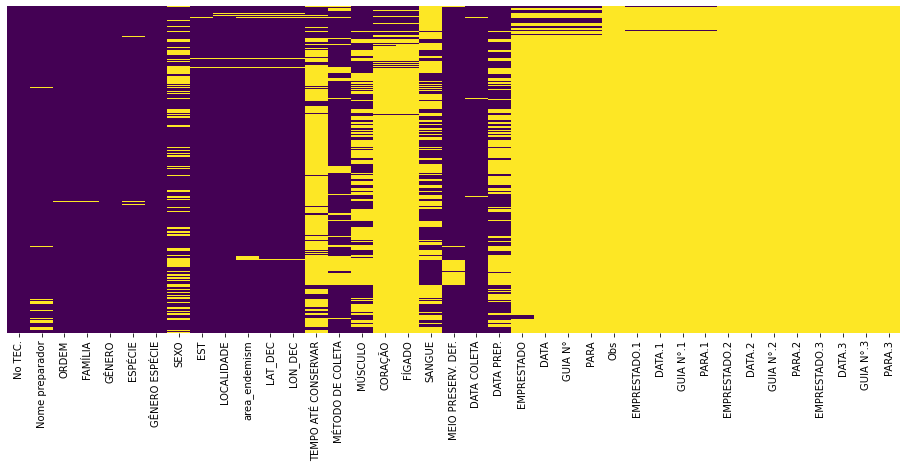

In [1520]:
plt.figure(figsize=(16, 6))
sns.heatmap(data_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**We can see that the most problematic fields are: 'Nome do preparador', 'sexo', 'tempo até conservar', 'metodo de coleta', 'data preparacao'. The remaining fields are not necessarily missing data and might not just be applicable for that record**

Let's take a look at these samples

In [1521]:
data_clean['Nome preparador'].isnull().sum()

1209

In [1522]:
data_clean[data_clean['Nome preparador'].isna() == True].head()

,No TEC.,Nome preparador,ORDEM,FAMÍLIA,GÊNERO,ESPÉCIE,GÊNERO ESPÉCIE,SEXO,EST,LOCALIDADE,area_endemism,LAT_DEC,LON_DEC,TEMPO ATÉ CONSERVAR,MÉTODO DE COLETA,MÚSCULO,CORAÇÃO,FÍGADO,SANGUE,MEIO PRESERV. DEF.,DATA COLETA,DATA PREP.,EMPRESTADO,DATA,GUIA N°,PARA,Obs,EMPRESTADO.1,DATA.1,GUIA N°.1,PARA.1,EMPRESTADO.2,DATA.2,GUIA N°.2,PARA.2,EMPRESTADO.3,DATA.3,GUIA N°.3,PARA.3
6609,INPA A 6615,NaN,Passeriformes,Tyrannidae,Elaenia,cristata,Elaenia cristata,NaN,RR,"Parque Nacional do Viruá; Estrada Perdida, km ...",Guiana,1.413,-60.989,NaN,Rede de neblina,NaN,NaN,NaN,X,Álcool,22/05/2012,22/05/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6610,INPA A 6616,NaN,Passeriformes,Tyrannidae,Elaenia,cristata,Elaenia cristata,NaN,RR,"Parque Nacional do Viruá; Estrada Perdida, km ...",Guiana,1.413,-60.989,NaN,Rede de neblina,NaN,NaN,NaN,X,Álcool,22/05/2012,22/05/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6611,INPA A 6617,NaN,Passeriformes,Tyrannidae,Elaenia,cristata,Elaenia cristata,NaN,RR,"Parque Nacional do Viruá; Estrada Perdida, km ...",Guiana,1.413,-60.989,NaN,Rede de neblina,NaN,NaN,NaN,X,Álcool,22/05/2012,22/05/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6638,INPA A 6644,NaN,Passeriformes,Tyrannidae,Elaenia,ruficeps,Elaenia ruficeps,NaN,RR,"Parque Nacional do Viruá; Estrada Perdida, km ...",Guiana,1.413,-60.989,7 h até geladeira,Rede de neblina,NaN,NaN,NaN,X,Álcool,23/05/2012,23/05/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6639,INPA A 6645,NaN,Passeriformes,Tyrannidae,Elaenia,cristata,Elaenia cristata,NaN,RR,"Parque Nacional do Viruá; Estrada Perdida, km ...",Guiana,1.413,-60.989,NaN,Rede de neblina,NaN,NaN,NaN,X,Álcool,23/05/2012,23/05/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1523]:
data_clean['SEXO'].isnull().sum()

8153

In [1524]:
data_clean['SEXO'].value_counts()

M        9458
F        6336
I        2463
I (M)      42
MJ         10
F?          9
(M)         4
M?          3
F           2
M           2
F (M)       2
FJ          1
F (?)       1
            1
I           1
? F         1
M/F?        1
Name: SEXO, dtype: int64

** Sex needs to be taken more seriously... This is a mess **

In [1525]:
data_clean[data_clean['MÉTODO DE COLETA'].isna() == True].sample(20)

,No TEC.,Nome preparador,ORDEM,FAMÍLIA,GÊNERO,ESPÉCIE,GÊNERO ESPÉCIE,SEXO,EST,LOCALIDADE,area_endemism,LAT_DEC,LON_DEC,TEMPO ATÉ CONSERVAR,MÉTODO DE COLETA,MÚSCULO,CORAÇÃO,FÍGADO,SANGUE,MEIO PRESERV. DEF.,DATA COLETA,DATA PREP.,EMPRESTADO,DATA,GUIA N°,PARA,Obs,EMPRESTADO.1,DATA.1,GUIA N°.1,PARA.1,EMPRESTADO.2,DATA.2,GUIA N°.2,PARA.2,EMPRESTADO.3,DATA.3,GUIA N°.3,PARA.3
251,INPA A 252,Alyson Vieira Melo,Passeriformes,Thamnophilidae,Rhegmatorhina,hoffmannsi,Rhegmatorhina hoffmannsi,M,RO,"ca 20 km N Abunã, margem direita do Rio Madeira",Rondonia,-9.521,-65.354,prep. 12 hrs após a morte,NaN,X,X,X,NaN,Nitrogênio líquido,24/06/2004,24/06/2004,X,17/12/2008,40.0,Camila Ribas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22498,INPA A 22504,Mônica S Ribas/Roberta L. Boss,Passeriformes,Thamnophilidae,Phlegopsis,nigromaculata,Phlegopsis nigromaculata,NaN,RO,"Porto Velho, margem direita do Rio Madeira; Mó...",Rondonia,-9.037,-64.250,NaN,NaN,NaN,NaN,NaN,X,NaN,27/11/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14005,INPA A 14011,Mateus Ferreira,Passeriformes,Dendrocolaptidae,Glyphorynchus,spirurus,Glyphorynchus spirurus,M,AM,"São Gabriel da Cachoeira, T.I. médio Rio Negro...",Imeri,-0.233,-66.850,NaN,NaN,X,NaN,NaN,NaN,Álcool,01/09/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20045,INPA A 20051,NaN,Passeriformes,Rhynchocyclidae,Mionectes,oleagineus,Mionectes oleagineus,I,RR,"Serra da Mocidade; ""Base 1""",Guiana,1.600,-61.900,NaN,NaN,NaN,NaN,NaN,X,NaN,22/01/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,INPA A 342,Alexandre Mendes Fernandes,Passeriformes,Thamnophilidae,Myrmoborus,myotherinus,Myrmoborus myotherinus,M,RO,"ca 45 km sudoeste de Porto Velho, margem esque...",Inambari,-9.065,-64.323,5 h até geladeira,NaN,X,NaN,NaN,NaN,Álcool 100%,15/11/2004,16/11/2004,X,21/07/2005,7.0,Alexandre Mendes Fernandes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23086,INPA A 23092,Mônica S Ribas/Roberta L. Boss,Passeriformes,Thamnophilidae,Willisornis,poecilinotus,Willisornis poecilinotus,M,RO,"Porto Velho, margem esquerda do Rio Madeira; M...",Inambari,-9.169,-64.616,NaN,NaN,NaN,NaN,NaN,X,NaN,08/06/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21422,INPA A 21428,Marco Aurélio Silva,Passeriformes,Cardinalidae,Cyanoloxia,rothschildii,Cyanoloxia rothschildii,M,AM,"Presidente Figueiredo, Lago UHE Balbina, Loren...",Guiana,-1.612,-59.635,NaN,NaN,NaN,NaN,NaN,X,NaN,26/08/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5313,INPA A 5319,"Camila Ribas, Fernando Horta, Renato Gaban",Piciformes,Picidae,Piculus,flavigula,Piculus flavigula,NaN,PA,"Aveiro, Rio Tapajós, margem esquerda, Igarapé ...",Rondonia,-3.432,-55.363,NaN,NaN,X,NaN,NaN,NaN,Álcool,10/12/2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6126,INPA A 6132,Jared Wolfe,Passeriformes,Thamnophilidae,Willisornis,poecilinotus,Willisornis poecilinotus,NaN,AM,"Fragmentos PDBFF, BR-174 80 km NE Manaus, Dimo...",Guiana,-2.342,-60.095,NaN,NaN,NaN,NaN,NaN,X,Lysis buffer,16/07/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17422,INPA A 17428,Carolina Schuch de Oliveira,Passeriformes,Dendrocolaptidae,Glyphorynchus,spirurus,Glyphorynchus spirurus,I,AM,"PDBFF, Acampamento Cabo Frio, Capoeira 1; CFCA...",Guiana,-2.391,-59.886,0,NaN,NaN,NaN,NaN,X,Longmire's solution,20/07/2014,20/07/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1526]:
data_clean['MÉTODO DE COLETA'].isnull().sum()

4816

In [1527]:
len(data_clean[(data_clean['MÉTODO DE COLETA'].isnull()) & (data_clean['SANGUE'] == 'X')])

2783

In [1528]:
print(f'Percentage of missing data that are blood samples: {2783/4816*100}')

Percentage of missing data that are blood samples: 57.78654485049833


In [1529]:
data_clean[(data_clean['MÉTODO DE COLETA'].isnull()) & (data_clean['SANGUE'] == 'X')].sample(10)

,No TEC.,Nome preparador,ORDEM,FAMÍLIA,GÊNERO,ESPÉCIE,GÊNERO ESPÉCIE,SEXO,EST,LOCALIDADE,area_endemism,LAT_DEC,LON_DEC,TEMPO ATÉ CONSERVAR,MÉTODO DE COLETA,MÚSCULO,CORAÇÃO,FÍGADO,SANGUE,MEIO PRESERV. DEF.,DATA COLETA,DATA PREP.,EMPRESTADO,DATA,GUIA N°,PARA,Obs,EMPRESTADO.1,DATA.1,GUIA N°.1,PARA.1,EMPRESTADO.2,DATA.2,GUIA N°.2,PARA.2,EMPRESTADO.3,DATA.3,GUIA N°.3,PARA.3
6172,INPA A 6178,Jared Wolfe,Passeriformes,Thamnophilidae,Thamnomanes,ardesiacus,Thamnomanes ardesiacus,NaN,AM,"Fragmentos PDBFF, BR-174 80 km NE Manaus, Dimo...",Guiana,-2.342,-60.095,NaN,NaN,NaN,NaN,NaN,X,Lysis buffer,26/08/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21952,INPA A 21958,João Vítor Campos e Silva,Passeriformes,Pipridae,Dixiphia,pipra,Dixiphia pipra,F,AM,"Manaus, BR 174 ca 60 km N de Manaus, Fazenda E...",Guiana,-2.388,-59.888,NaN,NaN,NaN,NaN,NaN,X,NaN,18/07/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22714,INPA A 22720,Mônica S Ribas/Roberta L. Boss,Passeriformes,Scleruridae,Sclerurus,macconnelli,Sclerurus macconnelli,NaN,RO,Porto Velho; margem direita do Rio Madeira; Mó...,Rondonia,-9.339,-64.720,NaN,NaN,NaN,NaN,NaN,X,NaN,01/06/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15828,INPA A 15834,Sérgio Henrique Borges,Passeriformes,Thamnophilidae,Myrmotherula,assimilis,Myrmotherula assimilis,M,AM,"Ilha Prosperança, Rio Negro, Parque Nacional d...",Imeri,-1.681,-61.493,NaN,NaN,NaN,NaN,NaN,X,Álcool 100%,25/08/2013,25/08/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1893,INPA A 1899,Alex Jahn,Passeriformes,Tyrannidae,Tyrannus,melancholicus,Tyrannus melancholicus,NaN,AM,Iranduba,Imeri,-3.287,-60.092,NaN,NaN,NaN,NaN,NaN,X,Buffer,01/08/2006,NaN,X,08/05/2007,26.0,Alex Jahn/Waleska Gravena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22759,INPA A 22765,Mônica S Ribas/Roberta L. Boss,Passeriformes,Turdidae,Turdus,albicollis,Turdus albicollis,NaN,RO,Porto Velho; margem esquerda do Rio Madeira; M...,Inambari,-9.314,-64.729,NaN,NaN,NaN,NaN,NaN,X,NaN,30/05/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23358,INPA A 23364,Shizuka Hashimoto,Passeriformes,Pipridae,Lepidothrix,serena,Lepidothrix serena,NaN,AM,"Rio Preto da Eva, BR 174 ca 60 km N de Manaus,...",Guiana,-2.354,-59.958,NaN,NaN,NaN,NaN,NaN,X,NaN,28/11/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20030,INPA A 20036,NaN,Passeriformes,Thraupidae,Ramphocelus,carbo,Ramphocelus carbo,I,RR,"Serra da Mocidade; ""Base 1""",Guiana,1.600,-61.900,NaN,NaN,NaN,NaN,NaN,X,NaN,21/01/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22668,INPA A 22674,Mônica S Ribas/Roberta L. Boss,Columbiformes,Columbidae,Geotrygon,montana,Geotrygon montana,M,RO,Porto Velho; margem esquerda do Rio Madeira; M...,Inambari,-9.309,-64.722,NaN,NaN,NaN,NaN,NaN,X,NaN,27/05/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21719,INPA A 21725,Jaqueline Rizzi Fortuna,Passeriformes,Pipridae,Dixiphia,pipra,Dixiphia pipra,M,AM,"Presidente Figueiredo, BR 174 ca 72 km N de Ma...",Guiana,-2.345,-60.095,NaN,NaN,NaN,NaN,NaN,X,NaN,14/10/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1530]:
data_clean[data_clean['DATA PREP.'].isna() == True].sample(20)

,No TEC.,Nome preparador,ORDEM,FAMÍLIA,GÊNERO,ESPÉCIE,GÊNERO ESPÉCIE,SEXO,EST,LOCALIDADE,area_endemism,LAT_DEC,LON_DEC,TEMPO ATÉ CONSERVAR,MÉTODO DE COLETA,MÚSCULO,CORAÇÃO,FÍGADO,SANGUE,MEIO PRESERV. DEF.,DATA COLETA,DATA PREP.,EMPRESTADO,DATA,GUIA N°,PARA,Obs,EMPRESTADO.1,DATA.1,GUIA N°.1,PARA.1,EMPRESTADO.2,DATA.2,GUIA N°.2,PARA.2,EMPRESTADO.3,DATA.3,GUIA N°.3,PARA.3
21105,INPA A 21111,Fábio Nunes e Ileyne Lopes,Psittaciformes,Psittacidae,Pyrrhura,griseipectus,Pyrrhura griseipectus,F,CE,"Ceará, Serra do Baturité, Caixa ninho K3",NaN,-4.226,-38.958,NaN,NaN,NaN,NaN,NaN,NaN,Álcool,18/07/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8987,INPA A 8993,Juliana Menger,Passeriformes,Scleruridae,Sclerurus,rufigularis,Sclerurus rufigularis,NaN,AM,Manaus; Reserva Ducke,Guiana,-2.943,-59.942,NaN,Rede de neblina,NaN,NaN,NaN,X,Álcool,18/08/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9425,INPA A 9431,Juliana Menger,Passeriformes,Platyrinchidae,Platyrinchus,saturatus,Platyrinchus saturatus,NaN,AM,Manaus; Reserva Ducke,Guiana,-2.943,-59.942,NaN,Rede de neblina,NaN,NaN,NaN,X,Álcool,10/09/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22565,INPA A 22571,Mônica S Ribas/Roberta L. Boss,Passeriformes,Dendrocolaptidae,Certhiasomus,stictolaemus,Certhiasomus stictolaemus,F,RO,Porto Velho; margem direita do Rio Madeira; Mó...,Rondonia,-9.448,-64.358,NaN,NaN,NaN,NaN,NaN,X,NaN,12/12/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10261,INPA A 10267,Affonso Henrique,Passeriformes,Tityridae,Schiffornis,amazonum,Schiffornis amazonum,NaN,AM,"BR 319, km 350, Grade PPBio, Módulo 7, parcela...",Inambari,-5.267,-61.917,NaN,Rede de neblina,NaN,NaN,NaN,X,Álcool,25/10/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24077,INPA A 24083,"João Capurucho, Marina Maximiano",Passeriformes,Tyrannidae,Ramphotrigon,ruficauda,Ramphotrigon ruficauda,NaN,RR,"ESEC Caracaraí-Vicinal do Água Boa, margem dir...",Guiana,1.787,-61.186,5h na geladeira,Rede de neblina,X,NaN,NaN,NaN,Álcool 100%,11/05/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21015,INPA A 21021,Fábio Nunes e Ileyne Lopes,Psittaciformes,Psittacidae,Pyrrhura,griseipectus,Pyrrhura griseipectus,M,CE,"Ceará, Serra do Baturité, Caixa ninho K2",NaN,-4.226,-38.958,NaN,NaN,NaN,NaN,NaN,NaN,Álcool,06/11/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11804,INPA A 11810,Marcelo Barreiros,Passeriformes,Pipridae,Lepidothrix,nattereri,Lepidothrix nattereri,I,PA,Margem esquerda do Rio Tapajós; 85 km sudoeste...,Rondonia,-4.694,-56.638,NaN,Rede de neblina,NaN,NaN,NaN,X,Álcool 95%,28/04/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4925,INPA A 4931,R. L. Dias,Galliformes,Cracidae,Crax,globulosa,Crax globulosa,NaN,AM,Santa Isabel do Rio Negro; PARNA Pico da Neblina,Guiana,0.459,-65.495,NaN,NaN,X,NaN,NaN,NaN,NaN,25/09/2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4363,INPA A 4369,João Marcos G. Capurucho,Passeriformes,Pipridae,Xenopipo,atronitens,Xenopipo atronitens,F,AM,RDS Uatumã; margem esquerda do Rio Uatumã; Cam...,Guiana,-2.182,-59.022,NaN,Rede de neblina,NaN,NaN,NaN,X,Álcool,06/07/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1531]:
data_clean['DATA PREP.'].isnull().sum()

11748

**SUMMARY OF MISSING DATA INFORMATION**

* Nome of the preparador: This information is crucial but a minor part (2k records) of this field is missing.


* Sexo: About 1/4 of the records have missing inforamation. The remaining records lack standardization. This needs to be seriously improved, the values should only me Male (M), Female (F), and undetermined (I). When unknown, this should be coded as 'I' and not missing. A serious standardization is required as it is not even possible to understand some of the values used to correct. This should be discussed and oriented to future collector and with the person responsible for inputing data. 


* Metodo de coleta: These are likely either to not have been filled in the datasheet by the collector or by the person who input data in the collection since many of records the general completeness of the record does not indicate other reason


* Data de preparacao: About half of the missing information is represented by blood samples, which typically don't have a preparation because there is generally no skin specimen associated. The curator needs to decide if preparation time should be the same as the collection date or if kept missing. 

## General representativeness of the collection

> Let's plot some nice graphs to see how the samples are distributed along the different categories

### Taxonomic category

#### ORDER

In [1532]:
data_clean[~data_clean['ORDEM'].isnull()]['ORDEM'].unique()

array(['Passeriformes', 'Piciformes', 'Galbuliformes', 'Charadriiformes',
       'Gruiformes', 'Psittaciformes', 'Apodiformes', 'Galliformes',
       'Caprimulgiformes', 'Cuculiformes', 'Tinamiformes',
       'Falconiformes', 'Pelecaniformes', 'Strigiformes', 'Coraciiformes',
       'Columbiformes', 'Accipitriformes', 'Nyctibiiformes',
       'Trogoniformes', 'Opisthocomiformes', 'Anseriformes',
       'Eurypygiformes', 'Suliformes', 'Cathartiformes'], dtype=object)

In [1533]:
print(f"Total number of Orders in the collection: {len(data_clean[~data_clean['ORDEM'].isnull()]['ORDEM'].unique())}")

Total number of Orders in the collection: 24


In [1534]:
# A list of the orders present in the collection, number of specimens and representativeness
order_accounting = pd.DataFrame({'Number of Specimens':data_clean['ORDEM'].value_counts().values,'Percentage':(data_clean['ORDEM'].value_counts()/data_clean['ORDEM'].value_counts().sum())*100})
order_accounting

,Number of Specimens,Percentage
Passeriformes,23039,86.995431
Apodiformes,968,3.655175
Psittaciformes,480,1.812483
Galbuliformes,450,1.699203
Piciformes,395,1.491523
Columbiformes,297,1.121474
Coraciiformes,173,0.653249
Caprimulgiformes,133,0.502209
Trogoniformes,87,0.328513
Accipitriformes,75,0.283201


In [1440]:
order_accounting.to_csv('results/order_accounting.csv')

In [278]:
least_collected_orders = data_clean['ORDEM'].value_counts().loc[lambda x : x<5].to_frame().reset_index().set_axis(['Ordem','Samples'],axis=1).sort_values(by=['Samples','Ordem'])
least_collected_orders

,Ordem,Samples
0,Eurypygiformes,3
1,Opisthocomiformes,3


In [1604]:
least_collected_orders.to_csv('results/least_collected_orders.csv')

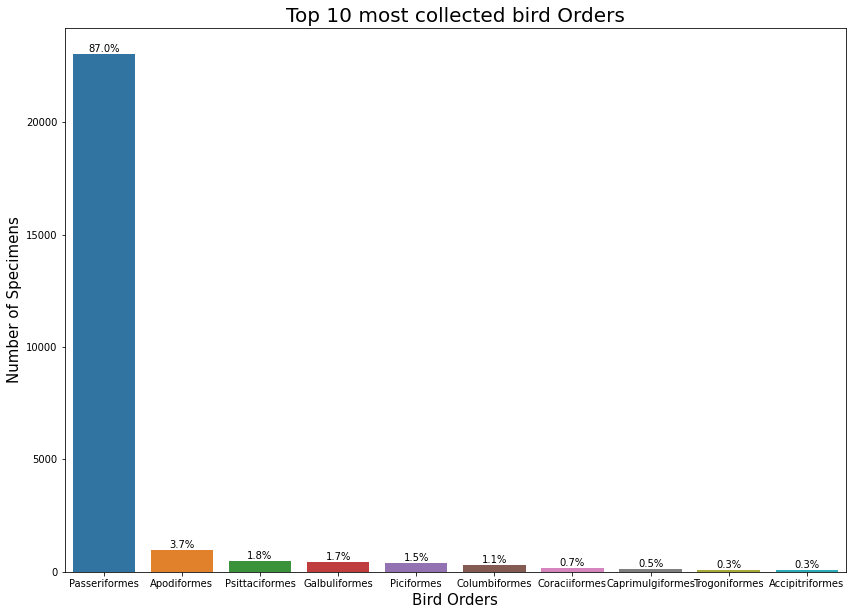

In [1535]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=data_clean['ORDEM'],order=data_clean['ORDEM'].value_counts(10).iloc[0:10].index,palette='tab10')
plt.title('Top 10 most collected bird Orders',fontsize=20)
plt.xlabel('Bird Orders',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['ORDEM'])


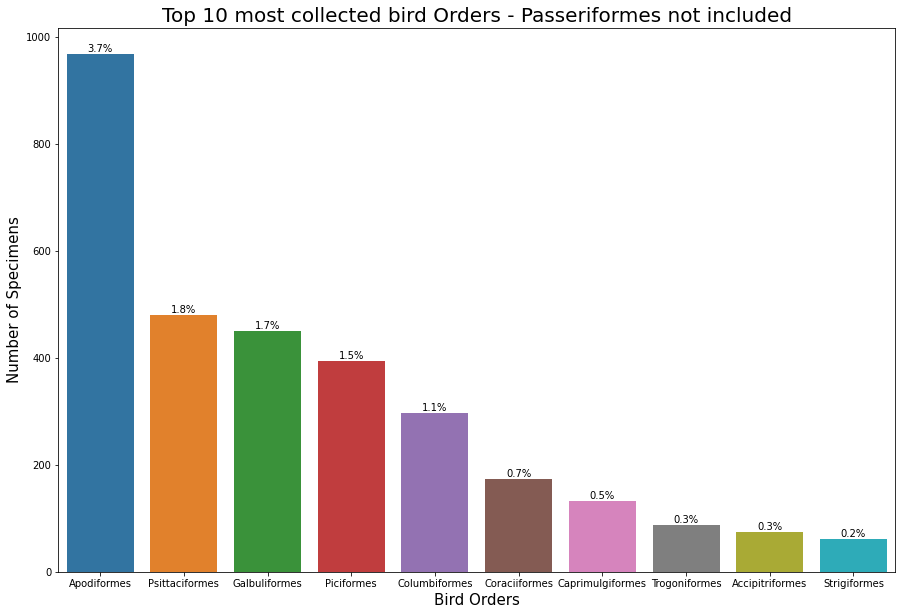

In [1427]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x=data_clean['ORDEM'],order=data_clean['ORDEM'].value_counts(10).iloc[1:11].index,palette='tab10')
plt.title('Top 10 most collected bird Orders - Passeriformes not included',fontsize=20)
plt.xlabel('Bird Orders',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['ORDEM'])

### FAMILY

In [1536]:
print(f"Total number of Bird Families in the collection: {len(data_clean[~data_clean['FAMÍLIA'].isnull()]['FAMÍLIA'].unique())}")

Total number of Bird Families in the collection: 76


In [1537]:
# A list of the bird Families present in the collection, number of specimens and representativeness
family_accounting = pd.DataFrame({'Number of Specimens':data_clean['FAMÍLIA'].value_counts().values,'Percentage':(data_clean['FAMÍLIA'].value_counts()/data_clean['FAMÍLIA'].value_counts().sum())*100})
family_accounting

,Number of Specimens,Percentage
Thamnophilidae,8285,31.284220
Pipridae,3874,14.628252
Dendrocolaptidae,3349,12.645848
Tyrannidae,1284,4.848393
Thraupidae,1235,4.663369
Rhynchocyclidae,1036,3.911944
Trochilidae,958,3.617415
Furnariidae,665,2.511045
Psittacidae,480,1.812483
Turdidae,474,1.789827


In [1444]:
family_accounting.to_csv('results/family_accounting.csv')

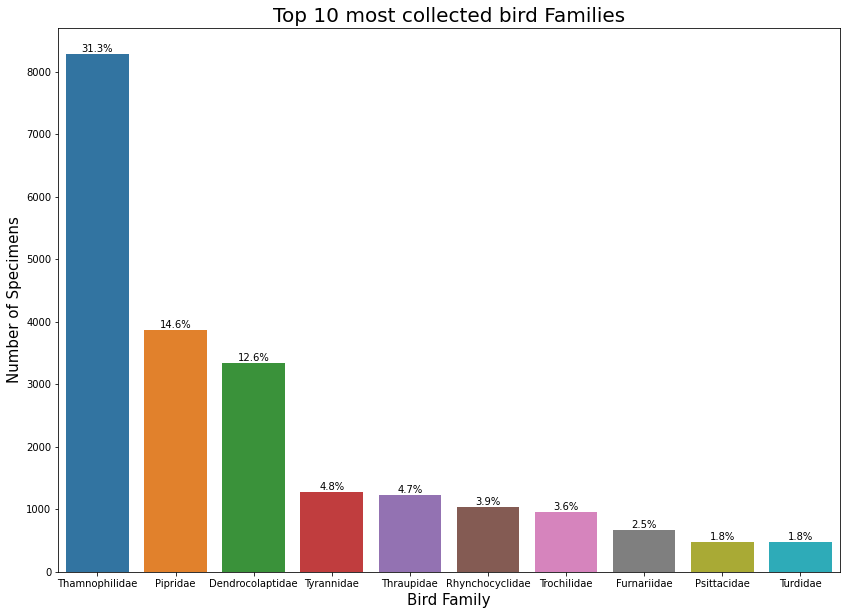

In [1538]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=data_clean['FAMÍLIA'],order=data_clean['FAMÍLIA'].value_counts(10).iloc[0:10].index,palette='tab10')
plt.title('Top 10 most collected bird Families',fontsize=20)
plt.xlabel('Bird Family',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['FAMÍLIA'])

In [1539]:
least_collected_families = data_clean['FAMÍLIA'].value_counts().loc[lambda x : x<5].to_frame().reset_index().set_axis(['Family','Samples'],axis=1).sort_values(by=['Samples','Family'])
least_collected_families

,Family,Samples
11,Laridae,1
13,Oxyruncidae,1
14,Recurvirostridae,1
12,Threskiornithidae,1
6,Anhimidae,2
9,Anhingidae,2
8,Aramidae,2
10,Jacanidae,2
7,Pandionidae,2
5,Sternidae,2


In [1605]:
least_collected_families.to_csv('results/least_collected_families.csv')

#### GENUS

In [1472]:
print(f"Total number of Bird Genera in the collection: {len(data_clean[~data_clean['GÊNERO'].isnull()]['GÊNERO'].unique())}")

Total number of Bird Genera in the collection: 444


In [1540]:
# A list of the Genera present in the collection, number of specimens and representativeness
genus_accounting = pd.DataFrame({'Number of Specimens':data_clean['GÊNERO'].value_counts().values,'Percentage':(data_clean['GÊNERO'].value_counts()/data_clean['GÊNERO'].value_counts().sum())*100})
genus_accounting

,Number of Specimens,Percentage
Glyphorynchus,1301,4.911287
Dixiphia,1069,4.035485
Lepidothrix,1005,3.793884
Myrmotherula,979,3.695734
Willisornis,861,3.250283
Thamnomanes,805,3.038883
Xiphorhynchus,739,2.789732
Pithys,738,2.785957
Dendrocincla,707,2.668932
Thamnophilus,580,2.189505


In [1446]:
genus_accounting.to_csv('results/genus_accounting.csv')

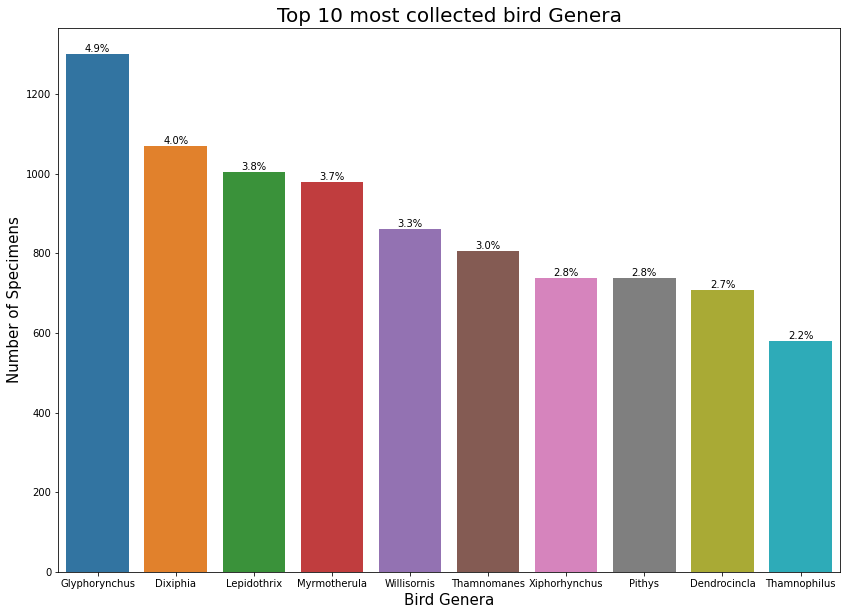

In [1556]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=data_clean['GÊNERO'],order=data_clean['GÊNERO'].value_counts(10).iloc[0:10].index,palette='tab10')
plt.title('Top 10 most collected bird Genera',fontsize=20)
plt.xlabel('Bird Genera',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['GÊNERO'])

In [1541]:
pd.set_option("display.max_rows", None)
least_collected_genera = data_clean['GÊNERO'].value_counts().loc[lambda x : x<5].to_frame().reset_index().set_axis(['Genus','Samples'],axis=1).sort_values(by=['Samples','Genus'])

In [474]:
least_collected_genera.to_csv('./results/least_collected_genera.csv')

#### SPECIES 

** Many taxa are not fully Identified (cf. or sp.) or identified at the subspecies level. I will process that first to eliminate those problems **

In [1561]:
# Delete records with cf. and sp.
species_full = data_clean[(~data_clean['GÊNERO ESPÉCIE'].str.contains('sp.',regex=False) == True) & (~data_clean['GÊNERO ESPÉCIE'].str.contains('cf.',regex=False) == True)]

In [ ]:
species_full

In [1562]:
# See if it worked
pd.DataFrame({'Number of Specimens':species_full['GÊNERO ESPÉCIE'].value_counts().values,'Percentage':(species_full['GÊNERO ESPÉCIE'].value_counts()/species_full['GÊNERO ESPÉCIE'].value_counts().sum())*100})

,Number of Specimens,Percentage
Glyphorynchus spirurus,1301,4.965838
Dixiphia pipra,1068,4.076491
Willisornis poecilinotus,856,3.267300
Pithys albifrons,738,2.816901
Xenopipo atronitens,527,2.011527
Lepidothrix coronata,523,1.996259
Myrmotherula axillaris,445,1.698538
Thamnomanes caesius,422,1.610749
Dendrocincla merula,402,1.534410
Elaenia ruficeps,355,1.355014


In [1565]:
#Clean species with more than two names, ex: subspecies
species_full['species_clean'] = species_full['GÊNERO ESPÉCIE'].str.split().str[0] + ' ' + species_full['GÊNERO ESPÉCIE'].str.split().str[1]

<ipython-input-1565-882d10b3dcab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_full['species_clean'] = species_full['GÊNERO ESPÉCIE'].str.split().str[0] + ' ' + species_full['GÊNERO ESPÉCIE'].str.split().str[1]


In [1598]:
species_accounting = pd.DataFrame({'Number of Specimens':species_full['species_clean'].value_counts().values,'Percentage':(species_full['species_clean'].value_counts()/species_full['species_clean'].value_counts().sum())*100})
species_accounting = species_accounting.rename_axis('Species').sort_values(by=['Number of Specimens', 'Species'],ascending=[False,True])
species_accounting

,Number of Specimens,Percentage
Species,,
Glyphorynchus spirurus,1301,4.966407
Dixiphia pipra,1068,4.076958
Willisornis poecilinotus,856,3.267674
Pithys albifrons,738,2.817224
Xenopipo atronitens,527,2.011758
Lepidothrix coronata,523,1.996488
Myrmotherula axillaris,445,1.698733
Thamnomanes caesius,422,1.610933
Dendrocincla merula,402,1.534585


In [1599]:
print(f"Total number of Bird Species in the collection: {len(species_accounting)}")

Total number of Bird Species in the collection: 956


In [1600]:
species_accounting.to_csv('results/species_accounting.csv')

** Let's try a first attempt to produce a list of amazonian birds. For that I'll filter species with records that fell into the polygons of the areas of endemism. Although this should be a pretty good guess, a few records failed to be  labeled during the GIS analyses, while others might be inside the polygon but are possible non amazonian because they might be in fragments of savanah inside the polygons or something else like that **

In [1620]:
amazonian_species_polygon_based = species_full[~species_full['area_endemism'].isnull()]['species_clean'].value_counts()
amazonian_species_polygon_based = pd.DataFrame({'Species':amazonian_species_polygon_based.index,'Number of Specimens':amazonian_species_polygon_based.values})
amazonian_species_polygon_based

,Species,Number of Specimens
0,Glyphorynchus spirurus,1297
1,Dixiphia pipra,1067
2,Willisornis poecilinotus,855
3,Pithys albifrons,735
4,Lepidothrix coronata,523
5,Xenopipo atronitens,516
6,Myrmotherula axillaris,444
7,Thamnomanes caesius,422
8,Dendrocincla merula,402
9,Elaenia ruficeps,355


In [1633]:
amazonian_species_polygon_based.to_csv('results/amazonian_species_based_on_polygon.csv')

In [1602]:
least_collected_species = species_full['species_clean'].value_counts().loc[lambda x : x<5].to_frame().reset_index().set_axis(['Species','Samples'],axis=1).sort_values(by=['Samples','Species'])
least_collected_species

,Species,Samples
295,Accipiter striatus,1
418,Actitis macularius,1
445,Amazilia brevirostris,1
328,Amazona amazonica,1
437,Amazona coerulescens,1
365,Amazona farinosa,1
325,Ammodramus humeralis,1
307,Antrostomus sericocaudatus,1
353,Anurolimnas castaneiceps,1
344,Ara chloropterus,1


In [1603]:
least_collected_species.to_csv('results/least_collected_species.csv')

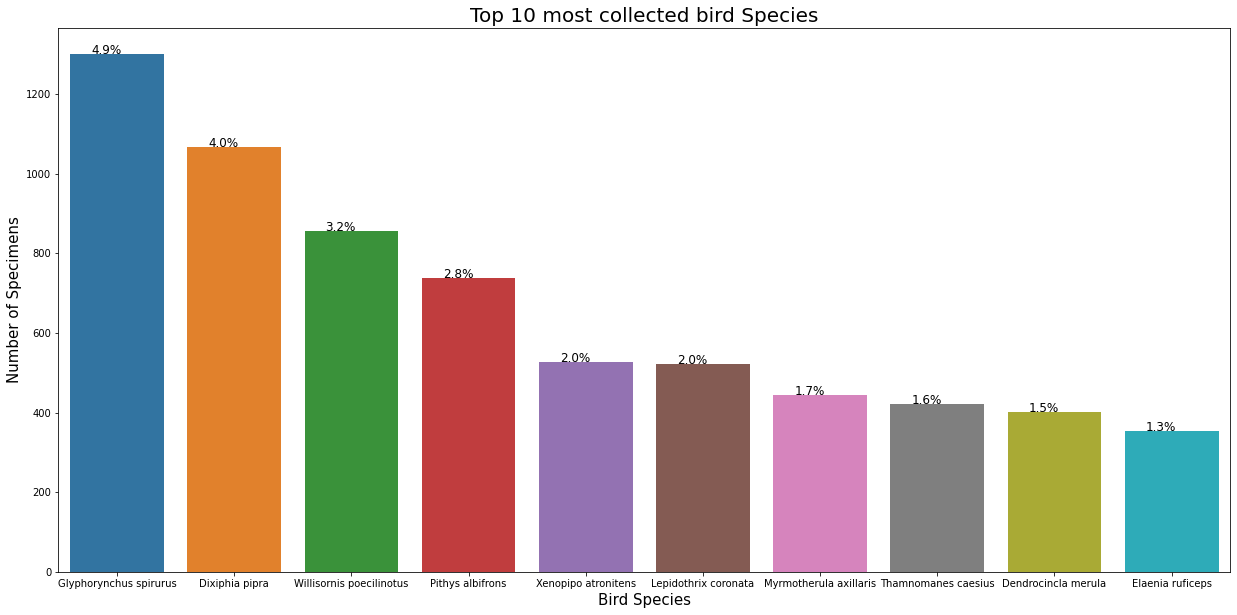

In [276]:
plt.figure(figsize=(21, 10))
ax = sns.countplot(x=data_clean['GÊNERO ESPÉCIE'],order=data_clean['GÊNERO ESPÉCIE'].value_counts(10).iloc[0:10].index,palette='tab10')
plt.title('Top 10 most collected bird Species',fontsize=20)
plt.xlabel('Bird Species',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

bar_percentage(ax,data_clean['GÊNERO ESPÉCIE'])

### Sex

* What proportion of samples are males and females?

In [495]:
least_collected_species = data_clean['GÊNERO ESPÉCIE'].value_counts().loc[lambda x : x<5].to_frame().reset_index().set_axis(['Species','Samples'],axis=1).sort_values(by=['Samples','Species'])
least_collected_species

,Species,Samples
437,Accipiter striatus,1
554,Actitis macularius,1
374,Amazilia brevirostris,1
488,Amazona amazonica,1
396,Amazona coerulescens,1
541,Amazona farinosa,1
559,Ammodramus humeralis,1
515,Antrostomus sericocaudatus,1
350,Anurolimnas castaneiceps,1
568,Ara chloropterus,1


In [496]:
# I will exclude samples which are not fully identified, which are the ones contain the suffixes sp. and cf.
least_collected_species[(~least_collected_species.Species.str.contains('sp.') == True) & (~least_collected_species.Species.str.contains('cf.') == True)]

,Species,Samples
437,Accipiter striatus,1
554,Actitis macularius,1
374,Amazilia brevirostris,1
488,Amazona amazonica,1
396,Amazona coerulescens,1
541,Amazona farinosa,1
559,Ammodramus humeralis,1
515,Antrostomus sericocaudatus,1
350,Anurolimnas castaneiceps,1
568,Ara chloropterus,1


In [492]:
least_collected_species.to_csv('./results/least_collected_species.csv')

In [1395]:
data_sex = data_clean[(data_clean['SEXO'] == 'M')| (data_clean['SEXO'] == 'F')]

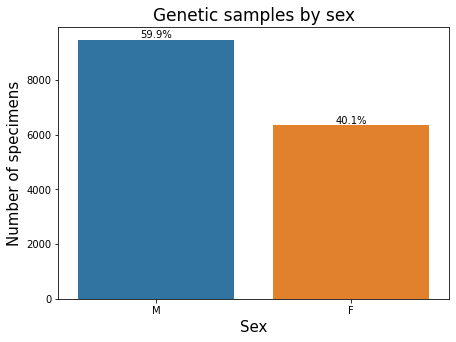

In [1396]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=data_sex['SEXO'],order=data_sex['SEXO'].value_counts().index)
plt.title('Genetic samples by sex',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,data_sex['SEXO'])



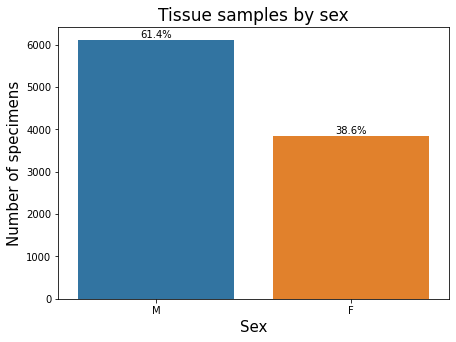

In [1397]:
#Filtering by tissue samples
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=data_sex[data_sex['MÚSCULO'] == 'X']['SEXO'],order=data_sex[data_sex['MÚSCULO'] == 'X']['SEXO'].value_counts().index)
plt.title('Tissue samples by sex',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,data_sex[data_sex['MÚSCULO'] == 'X']['SEXO'])

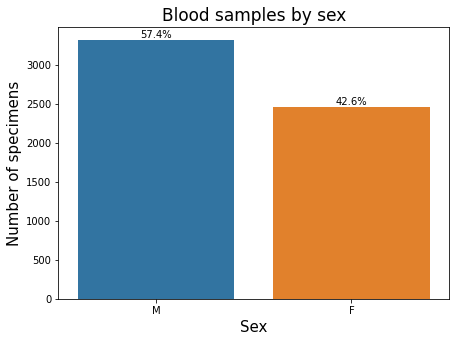

In [1398]:
#Filtering by blood samples
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=data_sex[data_sex['SANGUE'] == 'X']['SEXO'],order=data_sex[data_sex['SANGUE'] == 'X']['SEXO'].value_counts().index)
plt.title('Blood samples by sex',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,data_sex[data_sex['SANGUE'] == 'X']['SEXO'])

In [1399]:
data_sex['MÉTODO DE COLETA'].value_counts()

Rede de neblina                            11491
Tiro                                        1570
Encontrado morto                              98
Indivíduo não coletado, apenas anilhado       97
Achado morto                                  22
tiro                                          21
Manual                                        16
Enc. Morto                                    12
Bateu na janela                               10
Morreu na Rede de neblina                      9
Acidente                                       8
Armadilha                                      8
Atropelado                                     7
Enc. morto                                     7
Encontrado morto na rua                        3
Colisão aeronave                               3
Sacrificado                                    3
Atropelamento                                  3
Baladeira                                      3
Colisão com aeronave                           2
Atropelado, aeronave

___
**We can see that most samples are males, two hypothesis are likely to explain that**

1) **Males are more conspicuous (colorful) than females:** That could be corroborated if males were more collected by shot than females. However, this should not, or would not necessary, hold for specimens collected by mistnest because this method doesn't select target by visual instincts. 

2) **Males move around more than females**: thus they are more likely to fall into the mistnets. In some bird families however, females move around more to look for reproducing arenas (leks) composed only by males. If that is true, then we should see the opposite pattern for these families.

3) **Females are less conspicous than males**: So they are not being properly identified during the labeling process of samples. In this hypothesis this bias is a mere lack of precision in identifying the samples' sex and not a real pattern.

* **Let's test Hypothesis 1**

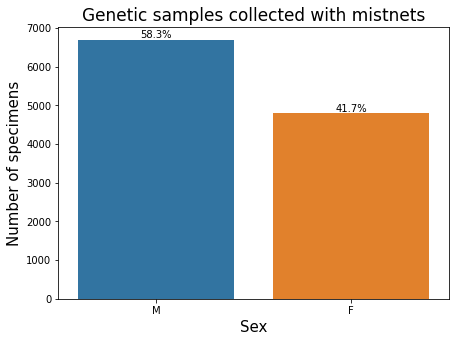

In [1400]:
#Filtering by method of collecting, mistnets
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=data_sex[data_sex['MÉTODO DE COLETA'] == 'Rede de neblina']['SEXO'],order=data_sex[data_sex['MÉTODO DE COLETA'] == 'Rede de neblina']['SEXO'].value_counts().index)
plt.title('Genetic samples collected with mistnets',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,data_sex[data_sex['MÉTODO DE COLETA'] == 'Rede de neblina']['SEXO'])


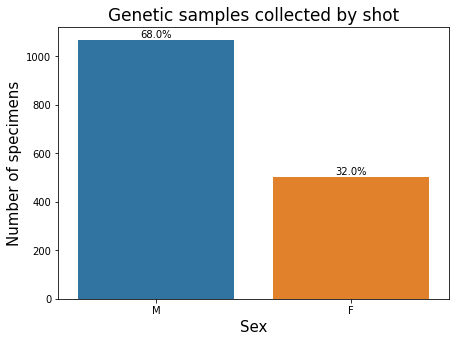

In [1401]:
#Filtering by method of collecting, shot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=data_sex[data_sex['MÉTODO DE COLETA'] == 'Tiro']['SEXO'],order=data_sex[data_sex['MÉTODO DE COLETA'] == 'Tiro']['SEXO'].value_counts().index)
plt.title('Genetic samples collected by shot',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,data_sex[data_sex['MÉTODO DE COLETA'] == 'Tiro']['SEXO'])


**Hypothesis 1**: The difference among sex in specimens collected by shot is much more pronouced than in samples collected by mistnets which corroborates hypothesis 1. However we still have a big difference in samples collected by mistnets

* **Let's test hypothesis 2**

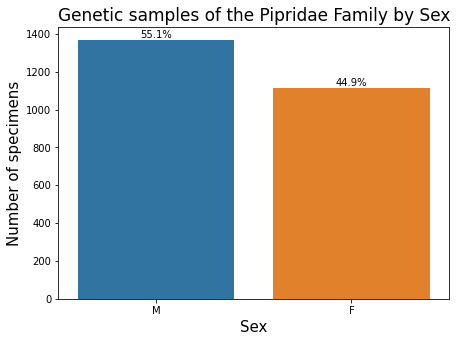

In [1402]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=data_sex[data_sex['FAMÍLIA'] == 'Pipridae']['SEXO'])
plt.title('Genetic samples of the Pipridae Family by Sex',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,data_sex[data_sex['FAMÍLIA'] == 'Pipridae']['SEXO'])



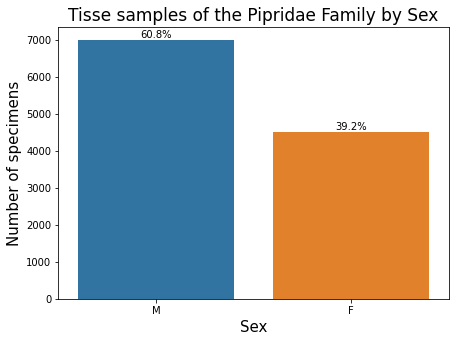

In [1403]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=data_sex[(data_sex['FAMÍLIA'] == 'Pipridae') | (data_sex['MÚSCULO'] == 'X')]['SEXO'],order=data_sex[(data_sex['FAMÍLIA'] == 'Pipridae') | (data_sex['MÚSCULO'] == 'X')]['SEXO'].value_counts().index)
plt.title('Tisse samples of the Pipridae Family by Sex',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,data_sex[(data_sex['FAMÍLIA'] == 'Pipridae') | (data_sex['MÚSCULO'] == 'X')]['SEXO'])

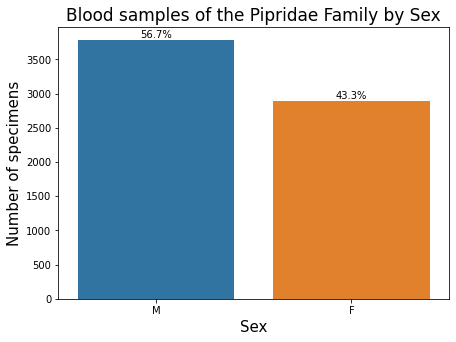

In [1404]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=data_sex[(data_sex['FAMÍLIA'] == 'Pipridae') | (data_sex['SANGUE'] == 'X')]['SEXO'])
plt.title('Blood samples of the Pipridae Family by Sex',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,data_sex[(data_sex['FAMÍLIA'] == 'Pipridae') | (data_sex['SANGUE'] == 'X')]['SEXO'])


**Hypothesis** 2 could not be corroborated as the pattern also holds for the Pipridae Family

* **Hypothesis 3** is much harder to test. We could compare the distribution of tissue and blood samples. Tissue samples are usually skin specimens which are identified based on gonads and does not rely on counspicouness of pluamge coloration. Thus we would expect that the difference is greater in blood than in tissue samples. That was not what we previously saw which does not corroborate H3 (see graph below). Maybe males are naturally more abundant?? Interesting question!

** Let's make a good summary graph by sex **

In [1405]:
sample_type_sexo = data_clean[(data_clean['SEXO'] == 'M') | (data_clean['SEXO'] == 'F')][['MÚSCULO','SANGUE','SEXO']]
df = sample_type_sexo.groupby('SEXO').count().reset_index()
tidy = df.melt(id_vars='SEXO').rename(columns=str.title)
tidy

,Sexo,Variable,Value
0,F,MÚSCULO,3843
1,M,MÚSCULO,6110
2,F,SANGUE,2464
3,M,SANGUE,3318


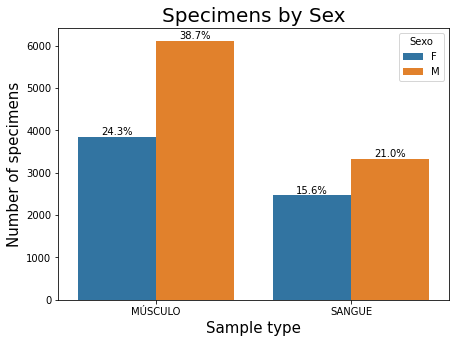

In [1406]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(data=tidy,x='Variable', y='Value',hue='Sexo')
plt.title('Specimens by Sex',fontsize=20)
plt.xlabel('Sample type',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,sample_type_sexo)


### Specimens per Area

#### State

In [1630]:
specimens_per_state = pd.DataFrame({'Number of specimens':data_clean['EST'].value_counts(),'Proportion':(data_clean['EST'].value_counts()/data_clean['EST'].value_counts().sum())*100})
specimens_per_state

,Number of specimens,Proportion
AM,16458,62.511395
PA,4833,18.356882
RR,2296,8.720754
RO,1507,5.723944
AC,441,1.675023
MT,347,1.317988
CE,281,1.067305
SC,100,0.379824
AP,56,0.212701
MG,4,0.015193


In [1632]:
specimens_per_state.to_csv('results/specimens_per_state.csv')

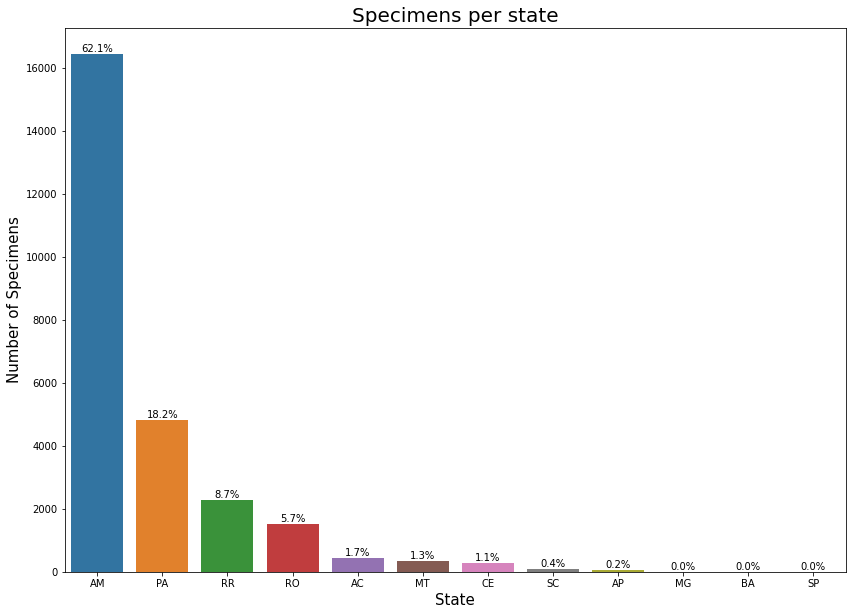

In [699]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=data_clean['EST'],order=data_clean['EST'].value_counts().iloc[0:12].index,palette='tab10')
plt.title('Specimens per state',fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['EST'])

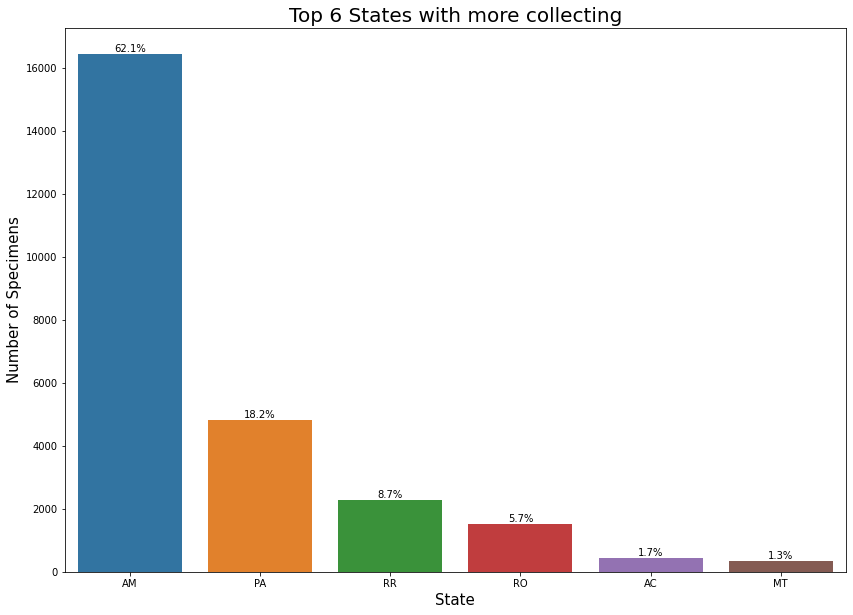

In [700]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=data_clean['EST'],order=data_clean['EST'].value_counts().iloc[0:6].index,palette='tab10')
plt.title('Top 6 States with more collecting',fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['EST'])

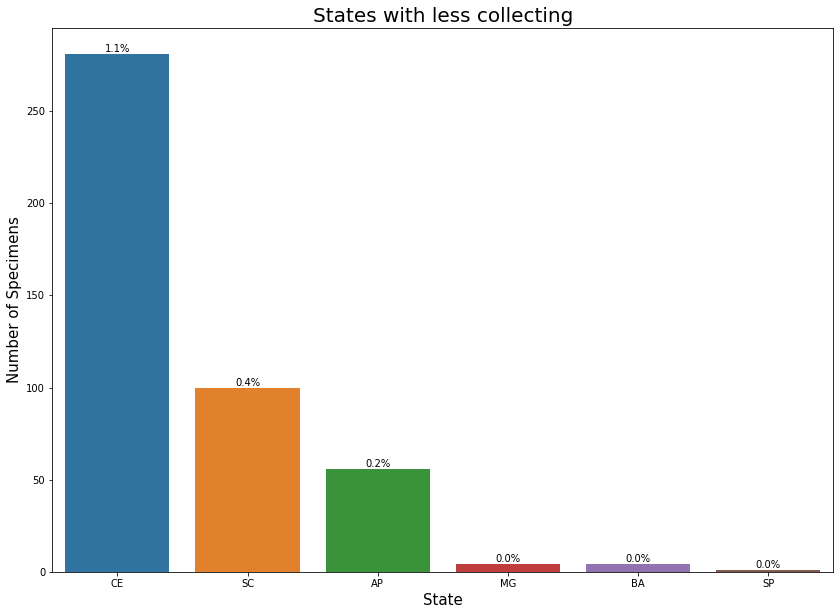

In [701]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=data_clean['EST'],order=data_clean['EST'].value_counts(10).iloc[-6:].index,palette='tab10')
plt.title('States with less collecting',fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['EST'])

# plt.figure(figsize=(25, 15))
# sns.countplot(x=data_clean['EST'],order=data_clean['EST'].value_counts(10).iloc[-6:].index,palette='tab10')

#### Specimens per Area of Endemism 

In [1634]:
specimens_per_AE = pd.DataFrame({'Number of specimens':data_clean['area_endemism'].value_counts(),'Proportion':(data_clean['area_endemism'].value_counts()/data_clean['area_endemism'].value_counts().sum())*100})
specimens_per_AE

,Number of specimens,Proportion
Guiana,11283,43.636153
Inambari,4873,18.845960
Rondonia,3618,13.992342
Imeri,3255,12.588467
Tapajos,2328,9.003365
Napo,352,1.361333
Xingu,148,0.572379


In [1635]:
specimens_per_AE.to_csv('results/specimen_per_ae.csv')

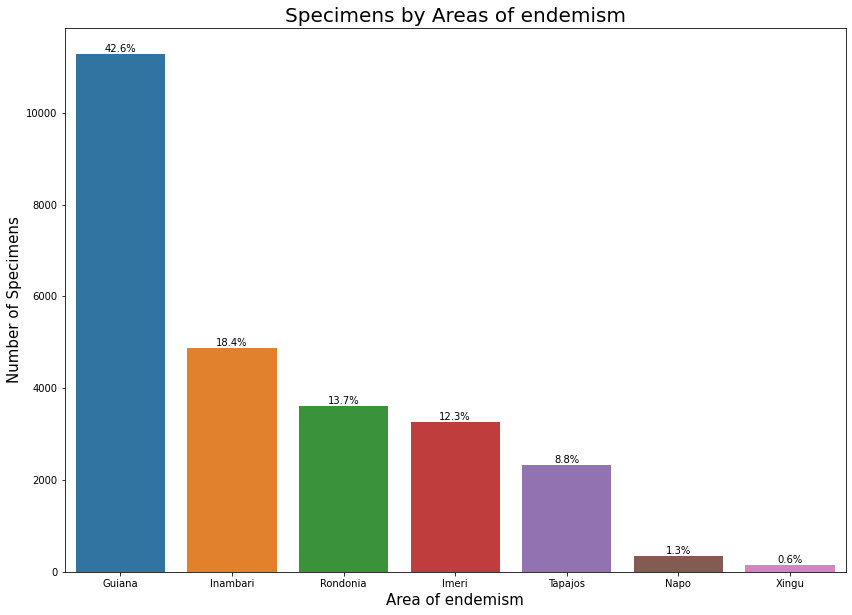

In [1416]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=data_clean['area_endemism'],order=data_clean['area_endemism'].value_counts().iloc[:10].index,palette='tab10')
plt.title('Specimens by Areas of endemism',fontsize=20)
plt.xlabel('Area of endemism',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['area_endemism'])

## Contributors

> Many researches have worked at INPA and contributed with hard work and sweat in field trips to collect all the samples.

> Let's see some of the top contributor so we can acklowledge everyone's work

### Top Collectors and Taxidermists

#### General collectors 

In [1407]:
top10_collectors = data_clean['Nome preparador'].value_counts().head(10)
top10_collectors

Gisiane Rodrigues Lima            2761
Juliana Menger                    2037
Cristiane Dreves                  1283
Carolina Schuch de Oliveira       1210
Cassiano Gatto e Roberta Boss      964
Sebastião Carlos Pereira           940
Mateus Ferreira                    910
Mônica S Ribas/Roberta L. Boss     907
Marcelo Barreiros                  902
Jared Wolfe                        676
Name: Nome preparador, dtype: int64

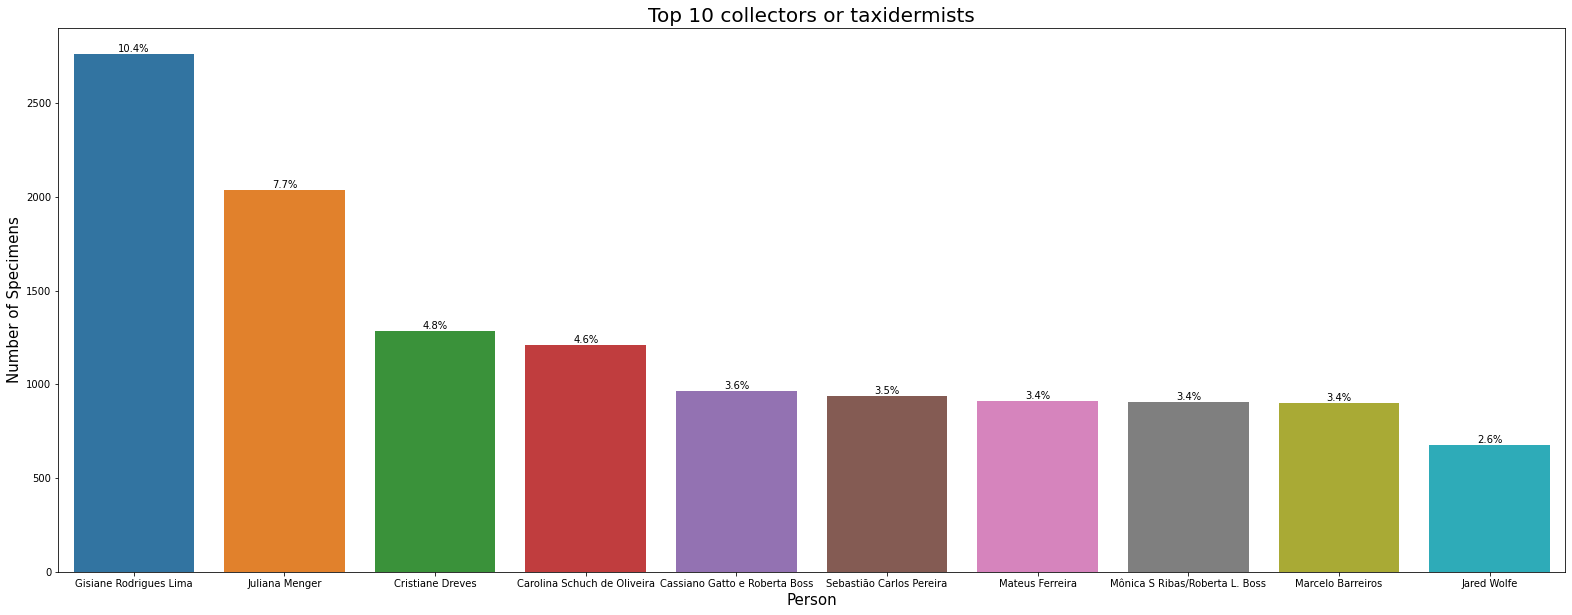

In [1408]:
plt.figure(figsize=(27, 10))
ax = sns.countplot(x=data_clean['Nome preparador'],order=data_clean['Nome preparador'].value_counts().iloc[0:10].index,palette='tab10')
plt.title('Top 10 collectors or taxidermists',fontsize=20)
plt.xlabel('Person',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['Nome preparador'])

** I can see that we have blood collector and taxidermists together in the same group which is not ideally. Each column should contain only one type of information. I'll break them a part by filtering by tissue samples which will represent taxidermist and blood samples which will represent blood collectors. Unfortunately it is not possible to retrieve a rank of General collectors due to limitations of the data. Maybe in the future by crossing the skins specimen and genetic resources databases **

##### Top taxidermists

In [1409]:
top_taxidermists = pd.DataFrame({'Specimens':data_clean[data_clean['MÚSCULO'] == 'X']['Nome preparador'].value_counts().head(10)})
top_taxidermists.index.name = 'Name'
top_taxidermists

,Specimens
Name,
Gisiane Rodrigues Lima,2744
Cristiane Dreves,1283
Sebastião Carlos Pereira,940
Mateus Ferreira,881
Paulo César Balduíno,666
Stephane dos Santos Pereira,626
"Camila Ribas, Fernando Horta, Renato Gaban",471
Elisama Franco Bezerra,391
Luciano Nicolás Naka,365


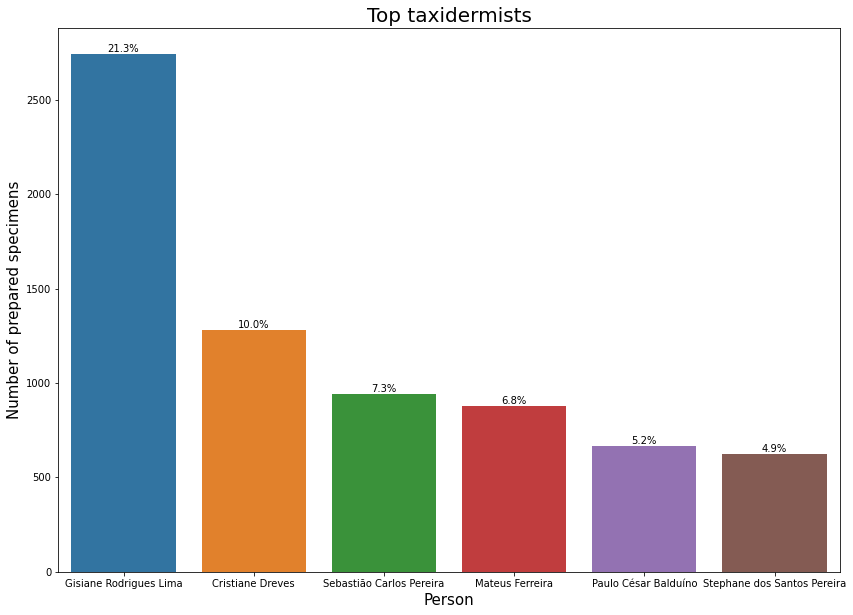

In [1410]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=data_clean[data_clean['MÚSCULO'] == 'X']['Nome preparador'],order=data_clean[data_clean['MÚSCULO'] == 'X']['Nome preparador'].value_counts().iloc[0:6].index,palette='tab10')
plt.title('Top taxidermists',fontsize=20)
plt.xlabel('Person',fontsize=15)
plt.ylabel('Number of prepared specimens',fontsize=15)

add_perc(ax,data_clean[data_clean['MÚSCULO'] == 'X']['Nome preparador'])


#### Top blood collectors

In [1414]:
top_blood_collectors = pd.DataFrame({'Specimens':data_clean[data_clean['SANGUE'] == 'X']['Nome preparador'].value_counts().head(10)})
top_blood_collectors.index.name = 'Name'
top_blood_collectors

,Specimens
Name,
Juliana Menger,2035
Carolina Schuch de Oliveira,1210
Cassiano Gatto e Roberta Boss,964
Mônica S Ribas/Roberta L. Boss,907
Marcelo Barreiros,902
Jared Wolfe,676
Affonso Henrique,556
Sérgio Henrique Borges,476
Thiago Bicudo,469


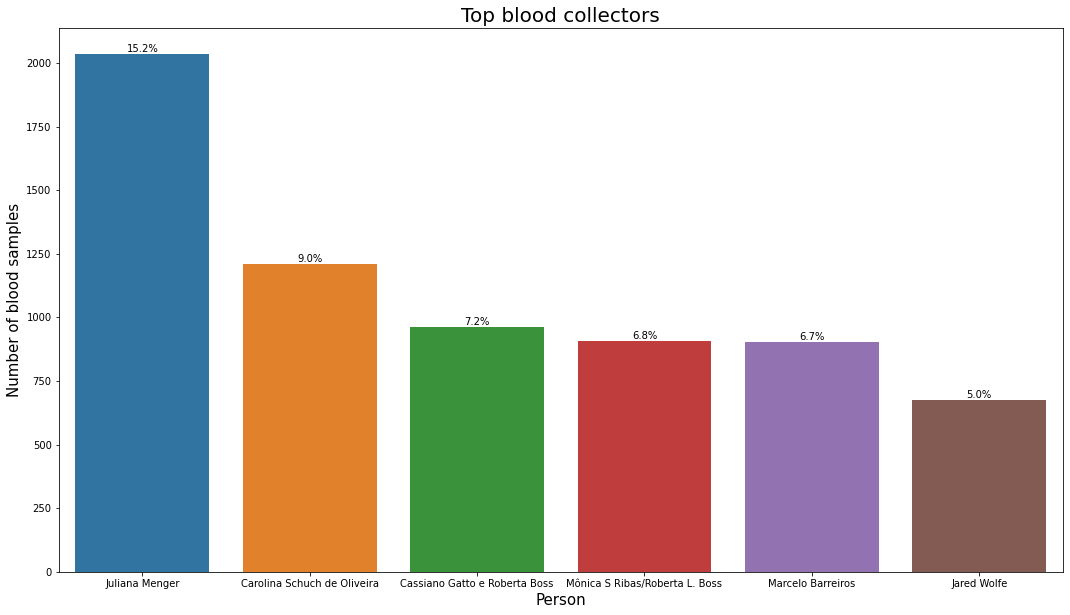

In [1412]:
plt.figure(figsize=(18, 10))
ax = sns.countplot(x=data_clean[data_clean['SANGUE'] == 'X']['Nome preparador'],order=data_clean[data_clean['SANGUE'] == 'X']['Nome preparador'].value_counts().iloc[0:6].index,palette='tab10')
plt.title('Top blood collectors',fontsize=20)
plt.xlabel('Person',fontsize=15)
plt.ylabel('Number of blood samples',fontsize=15)

add_perc(ax,data_clean[data_clean['SANGUE'] == 'X']['Nome preparador'])


## Evolution of the collection

> Things change, resources come and go, so does the number of specimens collected.

> Let's take a look of how collecting has evolved in the institution through time

### Temporal series

In [1700]:
collect = pd.DataFrame(data_clean['DATA COLETA'].apply(pd.to_datetime,errors='coerce'))

In [1701]:
collect = collect[collect['DATA COLETA'].isna() == False]

In [1702]:
collect.head()

,DATA COLETA
0,2003-11-09
1,2003-11-09
2,2003-11-09
3,2003-11-09
4,2003-12-09


In [1703]:
collect['year'] = pd.DataFrame(collect['DATA COLETA'].apply(lambda x: x.year))
collect.head()

,DATA COLETA,year
0,2003-11-09,2003
1,2003-11-09,2003
2,2003-11-09,2003
3,2003-11-09,2003
4,2003-12-09,2003


In [1704]:
collect_year = collect.groupby(by='year').count()

In [1705]:
collect_year.rename(columns={'DATA COLETA':'samples'},inplace=True)
collect_year

,samples
year,
1996,1
1998,1
1999,6
2000,1
2001,14
2002,25
2003,618
2004,300
2005,314


In [1706]:
collect_year.sort_values(by='samples',ascending=False)

,samples
year,
2012,5414
2013,5300
2011,2437
2014,2005
2010,1785
2019,1692
2017,1423
2018,1043
2016,790


#### Specimens collected by Year

Text(0.5, 0, 'Year')

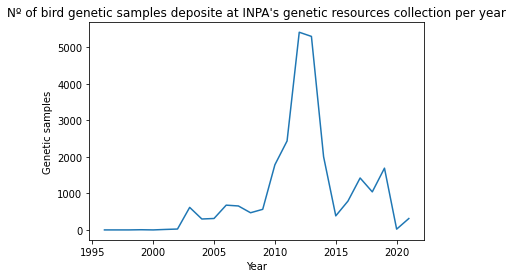

In [1682]:
sns.lineplot(data=collect_year,x='year', y = 'samples')
plt.title("Nº of bird genetic samples deposite at INPA's genetic resources collection per year")
plt.ylabel("Genetic samples")
plt.xlabel("Year")

In [1683]:
collect_year['cumsum'] = collect_year.samples.cumsum()
collect_year.head()

,samples,cumsum
year,,
1996,1,1
1998,1,2
1999,6,8
2000,1,9
2001,14,23


#### Collection growing

> Cumulative samples per year

Text(0, 0.5, 'Genetic samples')

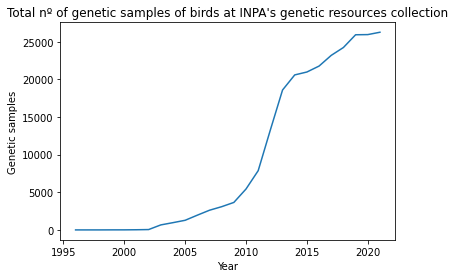

In [1684]:
sns.lineplot(data=collect_year,x='year', y = 'cumsum')
plt.title("Total nº of genetic samples of birds at INPA's genetic resources collection")
plt.xlabel("Year")
plt.ylabel("Genetic samples")

### Main Expeditions

In [1686]:
db['EXPEDIÇÃO'].value_counts(ascending=False).head(10)

JSM Doutorado 2012       785
São Gabriel 2013 MPEG    767
Sisbiota Japurá 2014     612
BR 319 PRONEX 2012       611
LNN Doutorado            533
Solimões                 488
PDBFF CF 2013            486
Sisbiota Purus 2012      474
Balbina                  469
Tapajós GM 2013 IV       449
Name: EXPEDIÇÃO, dtype: int64

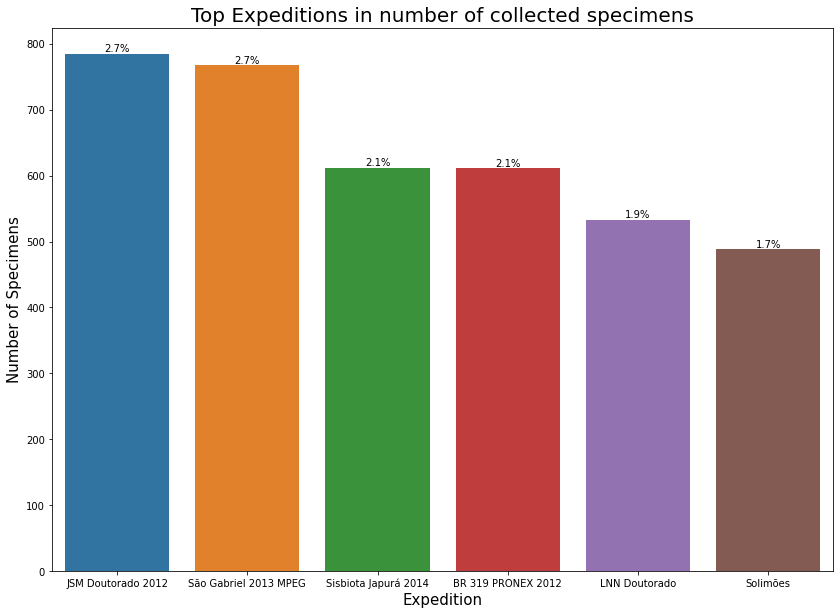

In [1697]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=db['EXPEDIÇÃO'],order=db['EXPEDIÇÃO'].value_counts().iloc[:6].index,palette='tab10')
plt.title('Top Expeditions in number of collected specimens',fontsize=20)
plt.xlabel('Expedition',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,db['EXPEDIÇÃO'])

## Tissue Loans

> ** One of the collection's main functions is to provide tissue loans/grants to other researchers so they can use samples in their studies. This is an important feature and we will take a look at those records. **

> ** However I can see that the records are split into two databases, one in our main spreadsheet and the other in a second spread. We'll combine them first and them perform some analyses **

In [1707]:
# data_clean['PARA.1'].value_counts()

In [1708]:
# data_clean['PARA.2'].value_counts()

In [1709]:
# data_clean['PARA.3'].value_counts()

In [1710]:
# grants = data_clean['PARA.1'].value_counts()+data_clean['PARA.2'].value_counts()+data_clean['PARA.3'].value_counts().sort_values(ascending=False)
# grants

In [1711]:
# data_clean[['PARA.1', 'PARA.2','PARA.3']].apply(pd.Series.value_counts)

In [1714]:
# data_clean[['PARA.1', 'PARA.2','PARA.3']].dropna().melt(var_name='columns', value_name='person')

In [1713]:
# tissue_loans = pd.DataFrame({'samples':data_clean[['PARA','PARA.1', 'PARA.2','PARA.3']].melt(var_name='columns', value_name='person')['person'].value_counts()})
# tissue_loans

In [1712]:
# sum(tissue_loans.samples)

In [1715]:
# plt.figure(figsize=(14,10))
# ax = sns.barplot(data=tissue_loans[:5],x=tissue_loans.index[:5], y='samples')
# plt.title('Top 5 tissue loans request by person',fontsize=20)
# plt.xlabel('Person',fontsize=15)
# plt.ylabel('Number of samples',fontsize=15)


# add_perc(ax,pd.DataFrame({'samples':data_clean[['PARA','PARA.1', 'PARA.2','PARA.3']].melt(var_name='columns', value_name='person')['person']}).dropna())


In [1716]:
# data_clean[['PARA','PARA.1', 'PARA.2','PARA.3']].melt(var_name='columns', value_name='person')['person'].value_counts()

In [1717]:
# data_clean[['PARA','PARA.1', 'PARA.2','PARA.3']].melt(var_name='columns', value_name='person')[['person']]

In [1718]:
# pd.DataFrame({'samples':data_clean[['PARA','DATA','PARA.1','DATA.1', 'PARA.2','DATA.2','PARA.3','DATA.3']].melt(var_name='columns', value_name='person')['person']}).dropna()

In [1719]:
# data_clean[['GUIA N°','GUIA N°.1','GUIA N°.2','GUIA N°.3','PARA','DATA','PARA.1','DATA.1', 'PARA.2','DATA.2','PARA.3','DATA.3']].melt(id_vars=('GUIA N°','GUIA N°.1','GUIA N°.2','GUIA N°.3'),value_vars=['DATA','DATA.1','DATA.2','DATA.3'])

In [1753]:
loans = data_clean[['GUIA N°','PARA','DATA']].dropna().groupby('GUIA N°').first()
loans

,PARA,DATA
GUIA N°,,
3.0,Carla Haisler Sardelli,01/06/2004
4.0,Carla Haisler Sardelli,09/09/2004
5.0,Carla Haisler Sardelli,05/11/2004
7.0,Alexandre Mendes Fernandes,21/07/2005
11.0,Alexandre Aleixo,28/10/2005
12.0,Alexandre Mendes Fernandes,09/12/2005
16.0,Marina Anciães,11/08/2006
17.0,Alexandre Mendes Fernandes,01/09/2006
18.0,Alexandre Mendes Fernandes,16/10/2006


In [1754]:
loans['number_specimen'] = data_clean[['GUIA N°','PARA','DATA']].dropna().groupby('GUIA N°').size()
loans.set_axis(['para','data','number_specimens'],axis=1,inplace=True)
loans

,para,data,number_specimens
GUIA N°,,,
3.0,Carla Haisler Sardelli,01/06/2004,10
4.0,Carla Haisler Sardelli,09/09/2004,11
5.0,Carla Haisler Sardelli,05/11/2004,8
7.0,Alexandre Mendes Fernandes,21/07/2005,37
11.0,Alexandre Aleixo,28/10/2005,8
12.0,Alexandre Mendes Fernandes,09/12/2005,28
16.0,Marina Anciães,11/08/2006,9
17.0,Alexandre Mendes Fernandes,01/09/2006,41
18.0,Alexandre Mendes Fernandes,16/10/2006,5


In [1755]:
loans_1 = data_clean[['GUIA N°.1','PARA.1','DATA.1']].dropna().groupby('GUIA N°.1').first()
loans_1['number_specimen'] = data_clean[['GUIA N°.1','PARA.1','DATA.1']].dropna().groupby('GUIA N°.1').size()
loans_1.set_axis(['para','data','number_specimens'],axis=1,inplace=True)
loans_1

,para,data,number_specimens
GUIA N°.1,,,
25.0,Luciano Nicolas Naka,05/03/2007,18
30.0,Curtis Marantz,18/07/2007,1
31.0,Marina Anciães,08/10/2007,1
34.0,Luciano Nicolas Naka,10/12/2007,5
35.0,Marina Anciães,29/12/2007,1
36.0,Alexandre Mendes Fernandes,22/04/2008,30
41.0,Luciano Nicolas Naka,17/12/2008,14
44.0,Marina Anciães,28/04/2009,42
48.0,Camila Ribas/Mario Cohn-Haft,17/07/2009,5


In [1756]:
loans_2 = data_clean[['GUIA N°.2','PARA.2','DATA.2']].dropna().groupby('GUIA N°.2').first()
loans_2['number_specimen'] = data_clean[['GUIA N°.2','PARA.2','DATA.2']].dropna().groupby('GUIA N°.2').size()
loans_2.set_axis(['para','data','number_specimens'],axis=1,inplace=True)
loans_2

,para,data,number_specimens
GUIA N°.2,,,
36.0,Alexandre Mendes Fernandes,22/04/2008,2
41.0,Luciano Nicolas Naka,17/12/2008,1
44.0,Marina Anciães,28/04/2009,9
51.0,Alexandre Mendes Fernandes,19/10/2009,24
58.0,Carlos Eduardo Agne,27/05/2010,1
61.0,Henrique Batalha Filho,26/11/2010,2


In [1757]:
loans_3 = data_clean[['GUIA N°.3','PARA.3','DATA.3']].dropna().groupby('GUIA N°.3').first()
loans_3['number_specimen'] = data_clean[['GUIA N°.3','PARA.3','DATA.3']].dropna().groupby('GUIA N°.3').size()
loans_3.set_axis(['para','data','number_specimens'],axis=1,inplace=True)
loans_3

,para,data,number_specimens
GUIA N°.3,,,
53.0,Alexandre Mendes Fernandes,23/10/2009,2


In [1758]:
loans_concat = pd.concat([loans,loans_1,loans_2,loans_3])

In [1759]:
loans_concat.head(63)

,para,data,number_specimens
3.0,Carla Haisler Sardelli,01/06/2004,10
4.0,Carla Haisler Sardelli,09/09/2004,11
5.0,Carla Haisler Sardelli,05/11/2004,8
7.0,Alexandre Mendes Fernandes,21/07/2005,37
11.0,Alexandre Aleixo,28/10/2005,8
12.0,Alexandre Mendes Fernandes,09/12/2005,28
16.0,Marina Anciães,11/08/2006,9
17.0,Alexandre Mendes Fernandes,01/09/2006,41
18.0,Alexandre Mendes Fernandes,16/10/2006,5
19.0,Marina Anciães,16/10/2006,33


In [1760]:
loans_concat['institution'] = ['Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Museu Paraense Emilio Goeldi','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Louisiana State University','University of Florida','Universidade de São Paulo','Museu Paraense Emilio Goeldi','University of Massachusetts','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Louisiana State University','Instituto Nacional de Pesquisas da Amazonia','Universitat Heidelberg','Museu Paraense Emilio Goeldi','Universidad Los Andes','Instituto Nacional de Pesquisas da Amazonia','Louisiana State University','Louisiana State University','Universidade Federal do Amazonas','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Universitat Heidelberg','Universitat Heidelberg','Museu Paraense Emilio Goeldi','Universitat Heidelberg','Pontifícia Universidade Católica do Rio Grande do Sul','Museu Paraense Emilio Goeldi','Pontifícia Universidade Católica do Rio Grande do Sul','Museu Nacional, UFRJ','Universidade de São Paulo','Instituto Nacional de Pesquisas da Amazonia','University of Massachusetts','Instituto Nacional de Pesquisas da Amazonia','Louisiana State University','Instituto Nacional de Pesquisas da Amazonia','Universitat Heidelberg','Louisiana State University','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Universitat Heidelberg','Museu Paraense Emilio Goeldi','Universitat Heidelberg','Pontifícia Universidade Católica do Rio Grande do Sul','Universidade de São Paulo','Universitat Heidelberg','Louisiana State University','Instituto Nacional de Pesquisas da Amazonia','Universitat Heidelberg','Pontifícia Universidade Católica do Rio Grande do Sul','Universidade de São Paulo','Universitat Heidelberg']
loans_concat.sample(3)

,para,data,number_specimens,institution
41.0,Luciano Nicolas Naka,17/12/2008,61,Louisiana State University
22.0,Alexandre Mendes Fernandes,27/11/2006,3,Instituto Nacional de Pesquisas da Amazonia
25.0,Luciano Nicolas Naka,05/03/2007,18,Instituto Nacional de Pesquisas da Amazonia


In [1761]:
loans_concat['pais'] = ['Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Estados Unidos','Estados Unidos','Brasil','Brasil','Estados Unidos','Brasil','Brasil','Estados Unidos','Brasil','Alemanha','Brasil','Colombia','Brasil','Estados Unidos','Estados Unidos','Brasil','Brasil','Brasil','Brasil','Alemanha','Alemanha','Brasil','Alemanha','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Estados Unidos','Brasil','Estados Unidos','Brasil','Alemanha','Estados Unidos','Brasil','Brasil','Alemanha','Brasil','Alemanha','Brasil','Brasil','Alemanha','Estados Unidos','Brasil','Alemanha','Brasil','Brasil','Alemanha']
loans_concat.sample(1)

,para,data,number_specimens,institution,pais
41.0,Luciano Nicolas Naka,17/12/2008,1,Louisiana State University,Estados Unidos


In [1762]:
loans_concat['estado'] = ['Amazonas','Amazonas','Amazonas','Amazonas','Para','Amazonas','Amazonas','Amazonas','Amazonas','Amazonas','Amazonas','Amazonas','Amazonas','Amazonas',np.nan,np.nan,'Sao Paulo','Para',np.nan,'Amazonas','Amazonas',np.nan,'Amazonas',np.nan,'Para',np.nan,'Amazonas',np.nan,np.nan,'Amazonas','Amazonas','Amazonas','Amazonas',np.nan,np.nan,'Para',np.nan,'Rio Grande do Sul','Para','Rio Grande do Sul','Rio de Janeiro','Sao Paulo','Amazonas',np.nan,'Amazonas',np.nan,'Amazonas',np.nan,np.nan,'Amazonas','Amazonas',np.nan,'Para',np.nan,'Rio Grande do Sul','Sao Paulo',np.nan,np.nan,'Amazonas',np.nan,'Rio Grande do Sul','Universidade de Sao Paulo',np.nan]
loans_concat.sample(1)

,para,data,number_specimens,institution,pais,estado
44.0,Marina Anciães,28/04/2009,9,Instituto Nacional de Pesquisas da Amazonia,Brasil,Amazonas


In [1763]:
loans_imported = pd.read_csv('./database/cgr_inpa_loans.csv',sep=';')
loans_imported.sample(3)

,Número da Remessa,Coleção,Destinatário Responsável,Solicitante,Instituição de destino,Instituicao_do_solicitante,Pais,Estado,Data do empréstimo,Prazo de empréstimo,Foma de entrega do material,Número de Espécimes,Método de preservação,Natureza do envio,Conferido por
662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,T70,Herpeto,Miguel Trefaut Rodrigues,Renato Recoder,"Depto de Zoologia, Instituto de Biociências, U...",NaN,NaN,NaN,09/11/2015,1 ano,Correio,19.0,álcool,empréstimo,Marlene Freitas
931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1764]:
loans_imported = loans_imported[loans_imported['Coleção'] == 'Aves'][['Número da Remessa','Solicitante','Instituicao_do_solicitante','Pais', 'Estado','Data do empréstimo','Número de Espécimes']]
loans_imported.sample(3)

,Número da Remessa,Solicitante,Instituicao_do_solicitante,Pais,Estado,Data do empréstimo,Número de Espécimes
27,T23,Leonardo Miranda,Museu Paraense Emílio Goeldi,Brasil,Para,04/11/2013,25.0
209,T162,Eduardo Schultz,Instituto Nacional de Pesquisas da Amazônia,Brasil,Amazonas,21/12/2019,13.0
99,T87,Anderson Vieira Chaves,Universidade Federal de Minas Gerais,Brasil,Mins Gerias,29/08/2016,33.0


In [1765]:
loans_imported.set_index('Número da Remessa',inplace=True)
loans_imported.rename(columns={'Solicitante':'para','Instituicao_do_solicitante':'institution','Pais':'pais','Estado':'estado','Número de Espécimes':'number_specimens','Data do empréstimo':'data'},inplace=True)
loans_imported.sample(3)

,para,institution,pais,estado,data,number_specimens
Número da Remessa,,,,,,
T20,Pablo Cerqueira,Museu Paraense Emílio Goeldi,Brasil,Para,02/09/2013,7.0
T5,Antonita Santana,Museu Paraense Emílio Goeldi,Brasil,Para,28/05/2012,55.0
T131,Thais P. Feitosa,Universidade Federal de Mato Grosso,Brasil,Mato Grosso,24/09/2018,5.0


In [1766]:
loans = pd.concat([loans_concat,loans_imported])
loans.sample(3)


,para,data,number_specimens,institution,pais,estado
T24,Juliana Menger,08/11/2013,659.0,Helmholtz Centre for Environmental Research,Alemanha,NaN
T97,Claydson Assis,27/03/2017,88.0,Universidade de São Paulo,Brasil,Sao Paulo
T105,Glaucia Del Rio,24/07/2017,45.0,Universidade de São Paulo,Brasil,Sao Paulo


In [1767]:
loans['data'] = pd.DataFrame(loans['data'].apply(pd.to_datetime,errors='coerce'))

In [1768]:
loans['year'] = pd.DataFrame(loans['data'].apply(lambda x: x.year))
loans.sample(3)

,para,data,number_specimens,institution,pais,estado,year
22.0,Alexandre Mendes Fernandes,2006-11-27,3.0,Instituto Nacional de Pesquisas da Amazonia,Brasil,Amazonas,2006
T19,Camila Duarte,2013-06-13,7.0,Field Museum of Natural History,Estados Unidos,NaN,2013
T32,Carolina Schuch de Oliveira,2014-09-23,957.0,University of Missouri,Estados Unidos,NaN,2014


### Samples granted by person

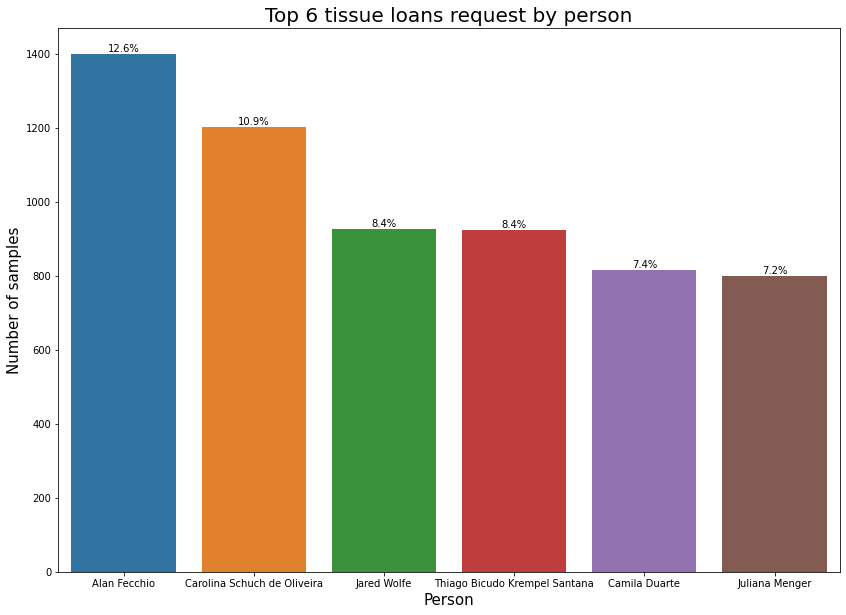

In [1769]:
plt.figure(figsize=(14,10))
ax = sns.barplot(y=loans.groupby('para').sum()['number_specimens'].sort_values(ascending=False)[:6],x=loans.groupby('para').sum()['number_specimens'].sort_values(ascending=False).index[:6])
plt.title('Top 6 tissue loans request by person',fontsize=20)
plt.xlabel('Person',fontsize=15)
plt.ylabel('Number of samples',fontsize=15)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/loans['number_specimens'].sum()), (x.mean(), y), ha='center', va='bottom')
        



### Samples granted by Country

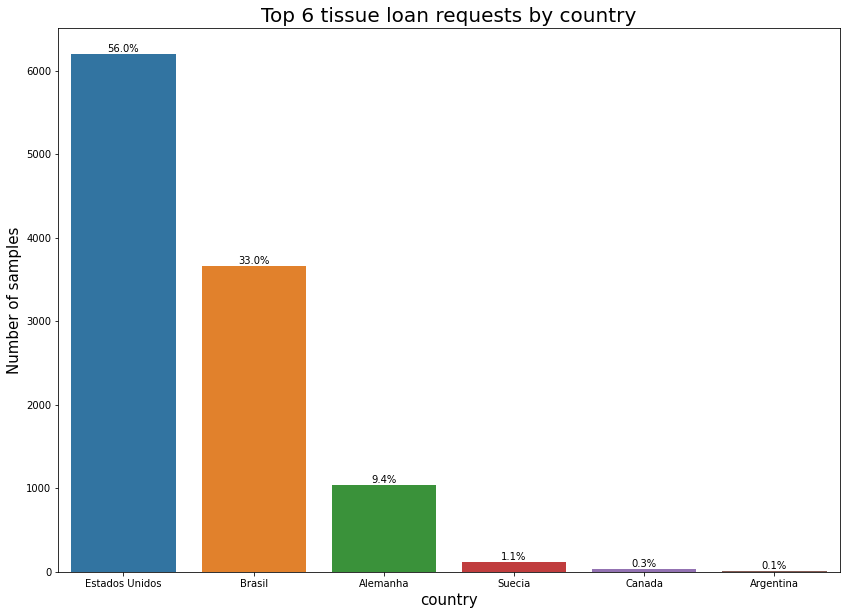

In [1770]:
plt.figure(figsize=(14,10))
ax = sns.barplot(y=loans.groupby('pais').sum()['number_specimens'].sort_values(ascending=False)[:6],x=loans.groupby('pais').sum()['number_specimens'].sort_values(ascending=False).index[:6])
plt.title('Top 6 tissue loan requests by country',fontsize=20)
plt.xlabel('country',fontsize=15)
plt.ylabel('Number of samples',fontsize=15)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/loans['number_specimens'].sum()), (x.mean(), y), ha='center', va='bottom')


### Samples granted by State

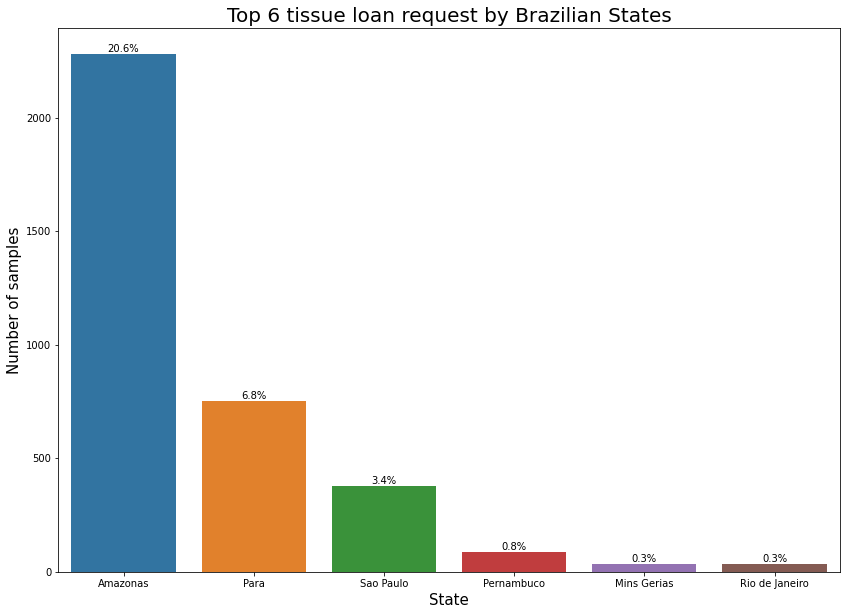

In [1771]:
plt.figure(figsize=(14,10))
ax = sns.barplot(y=loans.groupby('estado').sum()['number_specimens'].sort_values(ascending=False)[:6],x=loans.groupby('estado').sum()['number_specimens'].sort_values(ascending=False).index[:6])
plt.title('Top 6 tissue loan request by Brazilian States',fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of samples',fontsize=15)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/loans['number_specimens'].sum()), (x.mean(), y), ha='center', va='bottom')


### Samples granted by Institution

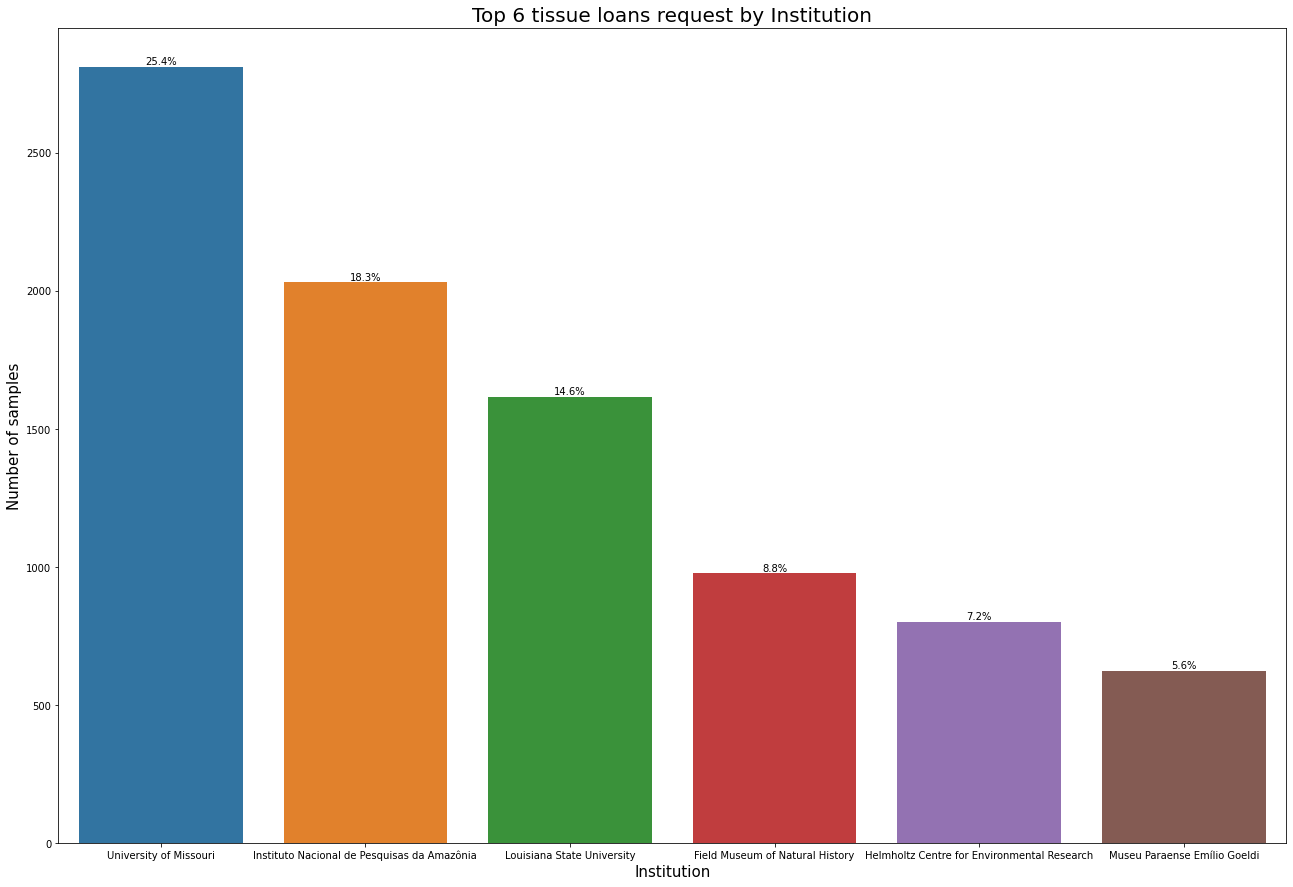

In [1167]:
plt.figure(figsize=(22,15))
ax = sns.barplot(y=loans.groupby('institution').sum()['number_specimens'].sort_values(ascending=False)[:6],x=loans.groupby('institution').sum()['number_specimens'].sort_values(ascending=False).index[:6])
plt.title('Top 6 tissue loans request by Institution',fontsize=20)
plt.xlabel('Institution',fontsize=15)
plt.ylabel('Number of samples',fontsize=15)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/loans['number_specimens'].sum()), (x.mean(), y), ha='center', va='bottom')


In [1177]:
loans.groupby(by='year').sum().cumsum()
# collect_year.samples.cumsum()


Int64Index([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='year')

### Samples granted through the years

Text(0, 0.5, 'Genetic samples')

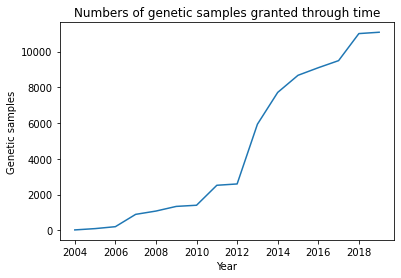

In [1186]:
sns.lineplot(x=loans.groupby(by='year').sum().cumsum().index, y = loans.groupby(by='year').sum().cumsum()['number_specimens'])
plt.title("Numbers of genetic samples granted through time")
plt.xlabel("Year")
plt.ylabel("Genetic samples")

<AxesSubplot:xlabel='year'>

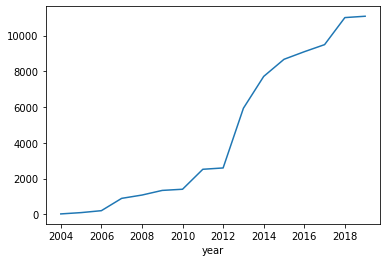

In [1191]:
loans.groupby('year').sum().cumsum()['number_specimens'].plot()

<AxesSubplot:xlabel='year', ylabel='pais'>

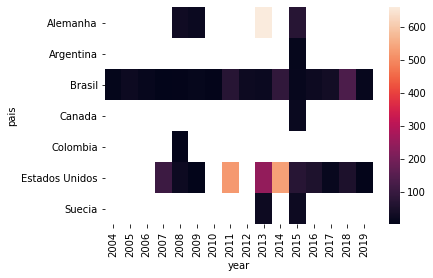

In [1200]:
loans

,para,data,number_specimens,institution,pais,estado,year
3.0,Carla Haisler Sardelli,2004-01-06,10.0,Instituto Nacional de Pesquisas da Amazonia,Brasil,Amazonas,2004
4.0,Carla Haisler Sardelli,2004-09-09,11.0,Instituto Nacional de Pesquisas da Amazonia,Brasil,Amazonas,2004
5.0,Carla Haisler Sardelli,2004-05-11,8.0,Instituto Nacional de Pesquisas da Amazonia,Brasil,Amazonas,2004
7.0,Alexandre Mendes Fernandes,2005-07-21,37.0,Instituto Nacional de Pesquisas da Amazonia,Brasil,Amazonas,2005
11.0,Alexandre Aleixo,2005-10-28,8.0,Museu Paraense Emilio Goeldi,Brasil,Para,2005
12.0,Alexandre Mendes Fernandes,2005-09-12,28.0,Instituto Nacional de Pesquisas da Amazonia,Brasil,Amazonas,2005
16.0,Marina Anciães,2006-11-08,9.0,Instituto Nacional de Pesquisas da Amazonia,Brasil,Amazonas,2006
17.0,Alexandre Mendes Fernandes,2006-01-09,41.0,Instituto Nacional de Pesquisas da Amazonia,Brasil,Amazonas,2006
18.0,Alexandre Mendes Fernandes,2006-10-16,5.0,Instituto Nacional de Pesquisas da Amazonia,Brasil,Amazonas,2006
19.0,Marina Anciães,2006-10-16,33.0,Instituto Nacional de Pesquisas da Amazonia,Brasil,Amazonas,2006


In [1207]:
loans['month'] = pd.DataFrame(loans['data'].apply(lambda x: x.month))

<AxesSubplot:xlabel='month', ylabel='year'>

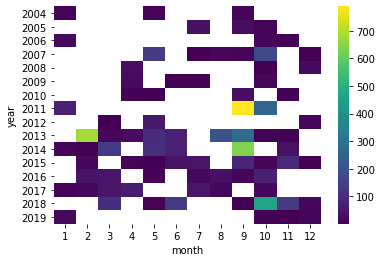

In [1208]:
sns.heatmap(loans.pivot_table(values='number_specimens',index='year',columns='month'),cmap='viridis')